### Table of Contents

* [Goals](#goals)
* [Data](#Data)
    * [Loading the Data](#section1_1)
    * [Data Information](#section1_2)
* [Data Cleaning](#cleaning)
    * [Adding an Age Column](#section2_1)
    * [Checking the Education Variable](#section2_2)
* [Exploratory Data Analysis](#EDA)
    * [Big Picture](#section3_1)
    * [Purchasing Behavior by Income](#section3_2)
    * [More Purchasing Behavior by Income](#section3_3)
    * [Purchasing Behavior by Education and Income](#section3_4)
    * [Purchasing Behavior by Age](#section3_5)
    * [Purchasing Behavior by Marital Satatus](#section3_6)
    * [Purchasing Behavior by Amount of Children](#section3_7)
    * [Results from existing Marketing Campaigns](#section3_8)
    * [Geographical Data](#section3_9)
    * [Customer Complaints](#section3_10)
* [Conclusion](#conclusion)
    

### Goals <a class="anchor" id="Goals"></a>

This notebook contains an analysis on some marketing data. The goal for this project was to do the following:
* Get acquainted with the data
* Clean the data so it is ready for analysis
* Develop some questions for analysis
* Analyze variables within the data to gain patterns and insights on these questions

### Data <a class="anchor" id="Data"></a>

The data for this project was downloaded from Kaggle:

[https://www.kaggle.com/jackdaoud/marketing-data](https://www.kaggle.com/jackdaoud/marketing-data)

Information regarding the features for the data are located in the `Column` section on the website.

#### Loading the Data <a class="anchor" id="section1_1"></a>
First, the necessary libraries are loaded into the notebook. The pandas library is used to import data from marketing_data.csv and preview the first five rows of the DataFrame.

In [1]:
# sets up matplotlib with interactive features
%matplotlib notebook
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import re

In [2]:
marketing_data = pd.read_csv('E:\\Semo4ka\\Python\\CodeCademy\\data_analyst_portfolio_project\\marketing_data.csv')
print(marketing_data.head(5))

      id  YearBirth   Education MaritalStatus       Income  Kidhome  Teenhome  \
0   1826       1970  Graduation      Divorced  $84,835.00         0         0   
1      1       1961  Graduation        Single  $57,091.00         0         0   
2  10476       1958  Graduation       Married  $67,267.00         0         1   
3   1386       1967  Graduation      Together  $32,474.00         1         1   
4   5371       1989  Graduation        Single  $21,474.00         1         0   

  DtCustomer  Recency  MntWines  ...  NumStorePurchases  NumWebVisitsMonth  \
0    6/16/14        0       189  ...                  6                  1   
1    6/15/14        0       464  ...                  7                  5   
2    5/13/14        0       134  ...                  5                  2   
3    5/11/14        0        10  ...                  2                  7   
4     4/8/14        0         6  ...                  2                  7   

   AcceptedCmp3  AcceptedCmp4  AcceptedCmp5 

#### Data Information <a class="anchor" id="section1_2"></a>

Some immediate insights are:
* There are 28 columns and 2240 rows.
* The name and datatype of each column -- most values are integers in this dataset.
* The ` income` column has missing data, values that are not integers or floats. 
* The column names could be renamed for more consistency.
* Some basic summary statistics on each of the numerical variables.

In [3]:
marketing_data.columns

Index(['id', 'YearBirth', 'Education', 'MaritalStatus', 'Income', 'Kidhome',
       'Teenhome', 'DtCustomer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProducts', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')

In [4]:
marketing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   2240 non-null   int64 
 1   YearBirth            2240 non-null   int64 
 2   Education            2240 non-null   object
 3   MaritalStatus        2240 non-null   object
 4   Income               2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   DtCustomer           2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProducts      2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

In [5]:
marketing_data.isnull().sum()

id                      0
YearBirth               0
Education               0
MaritalStatus           0
Income                 24
Kidhome                 0
Teenhome                0
DtCustomer              0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProducts         0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64

In [6]:
print(marketing_data.describe())

                 id    YearBirth      Kidhome     Teenhome      Recency  \
count   2240.000000  2240.000000  2240.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804     0.444196     0.506250    49.109375   
std     3246.662198    11.984069     0.538398     0.544538    28.962453   
min        0.000000  1893.000000     0.000000     0.000000     0.000000   
25%     2828.250000  1959.000000     0.000000     0.000000    24.000000   
50%     5458.500000  1970.000000     0.000000     0.000000    49.000000   
75%     8427.750000  1977.000000     1.000000     1.000000    74.000000   
max    11191.000000  1996.000000     2.000000     2.000000    99.000000   

          MntWines    MntFruits  MntMeatProducts  MntFishProducts  \
count  2240.000000  2240.000000      2240.000000      2240.000000   
mean    303.935714    26.302232       166.950000        37.525446   
std     336.597393    39.773434       225.715373        54.628979   
min       0.000000     0.000000         0.000000

#### Data Cleaning <a class="anchor" id="cleaning"></a>

As mentioned before, the `Income` column could use some cleaning. The column names overall could also be renamed for more consistency. To do this, the following is done:
* Put all columns in [snake case format](https://www.ssc.wisc.edu/sscc/pubs/DWE/book/4-2-naming-variables.html) using regex and list comprehension
* Change `Income` values to floats
* Set the values as floats

The `Income` distribution is then looked at using boxplots. Since there is one large outlier, it is removed from the `marketing_data`. Next, the missing values are replaced with the mean income using the `.mean()` method.

`Income` is one of the main variables that will be explored in the analysis, so it is essential that it is tidy and ready for exploration

In [7]:
# Clean Columns
# put all columns into snake case format
marketing_data.columns = [re.sub(r"(\w)([A-Z])", r"\1 \2", x).lower() for x in marketing_data.columns]
marketing_data.columns = marketing_data.columns.str.replace(' ', '_')
print(marketing_data.columns)

#taking dollar sign out of values and convert to float
marketing_data['income'] = marketing_data['income'].replace('[\$,]', '', regex = True).astype(float)

# summary stats
print(marketing_data['income'].describe())


Index(['id', 'year_birth', 'education', 'marital_status', 'income', 'kidhome',
       'teenhome', 'dt_customer', 'recency', 'mnt_wines', 'mnt_fruits',
       'mnt_meat_products', 'mnt_fish_products', 'mnt_sweet_products',
       'mnt_gold_products', 'num_deals_purchases', 'num_web_purchases',
       'num_catalog_purchases', 'num_store_purchases', 'num_web_visits_month',
       'accepted_cmp3', 'accepted_cmp4', 'accepted_cmp5', 'accepted_cmp1',
       'accepted_cmp2', 'response', 'complain', 'country'],
      dtype='object')
count      2216.000000
mean      52247.251354
std       25173.076661
min        1730.000000
25%       35303.000000
50%       51381.500000
75%       68522.000000
max      666666.000000
Name: income, dtype: float64


<IPython.core.display.Javascript object>


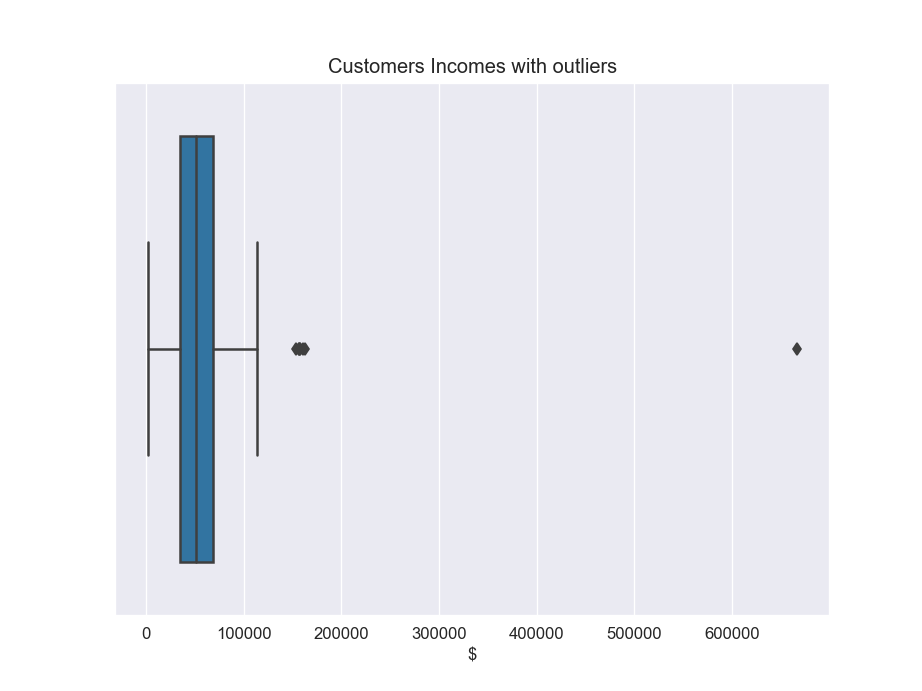

In [8]:
plt.figure()
sns.set_style('darkgrid')
sns.boxplot(data=marketing_data, x='income')
plt.title('Customers Incomes with outliers')
plt.xlabel('$')
plt.show()

This boxplot shows a major outlier on the right, so it is removed from the dataset. 

<IPython.core.display.Javascript object>


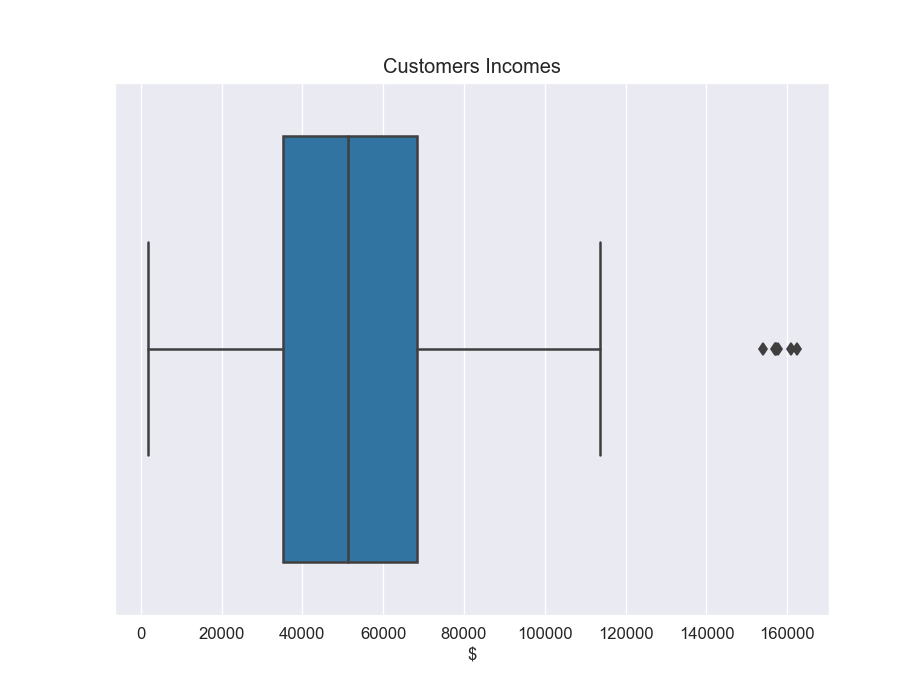

count      2215.000000
mean      51969.861400
std       21526.320095
min        1730.000000
25%       35284.000000
50%       51373.000000
75%       68487.000000
max      162397.000000
Name: income, dtype: float64

In [9]:
# remove incomes above 300000
marketing_data = marketing_data[marketing_data.income < 300000]
plt.figure()
sns.set_style('darkgrid')
sns.boxplot(data=marketing_data, x='income')
plt.title('Customers Incomes')
plt.xlabel('$')
plt.show()
marketing_data.income.describe()

After removing the outlier, the distribution is more symmetric. There are still some outliers; however, with not major skewness or huge outliers remaining, the `income` variable is ready for analysis.

In [10]:
# replace missing values with the mean income
marketing_data = marketing_data.fillna(value={'income': marketing_data.income.mean()})
marketing_data.income.describe()

count      2215.000000
mean      51969.861400
std       21526.320095
min        1730.000000
25%       35284.000000
50%       51373.000000
75%       68487.000000
max      162397.000000
Name: income, dtype: float64

#### Adding an age Column <a class="anchor" id="section2_1"></a>

The `marketing_data` DataFrame contains a `year_birth` column; however, a column with the age of each customer may be easier for analysis. Because of this, the following is done:

* A new column called `age` is made by subracting each value of `year_birth` from 2020 (the year the dataset is from). 
* Any outliers in `age` that could affect the analysis are removed. 

In [11]:
marketing_data['age'] = 2020 - marketing_data.year_birth
print(marketing_data.age.unique())


[ 50  59  62  53  31  66  73  41  61  39  51  43  60  54  44  55  64  45
  49  34  48  46  30  33  36  52  65  37  47  42  68  58  56  38  57  63
  40  75  71  72  67  74  35  28  76  69  32  70  26  27  29 127  24  25
 121  77  79  80 120]


<IPython.core.display.Javascript object>


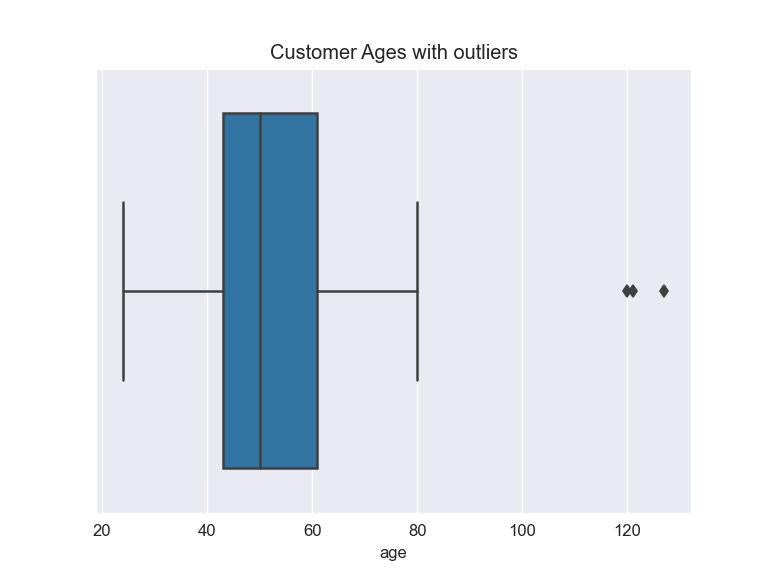

In [12]:
plt.figure()
sns.set_style('darkgrid')
sns.boxplot(data=marketing_data, x='age')
plt.title('Customer Ages with outliers')
plt.show()

In [13]:
marketing_data = marketing_data[marketing_data.age < 100] 


<IPython.core.display.Javascript object>


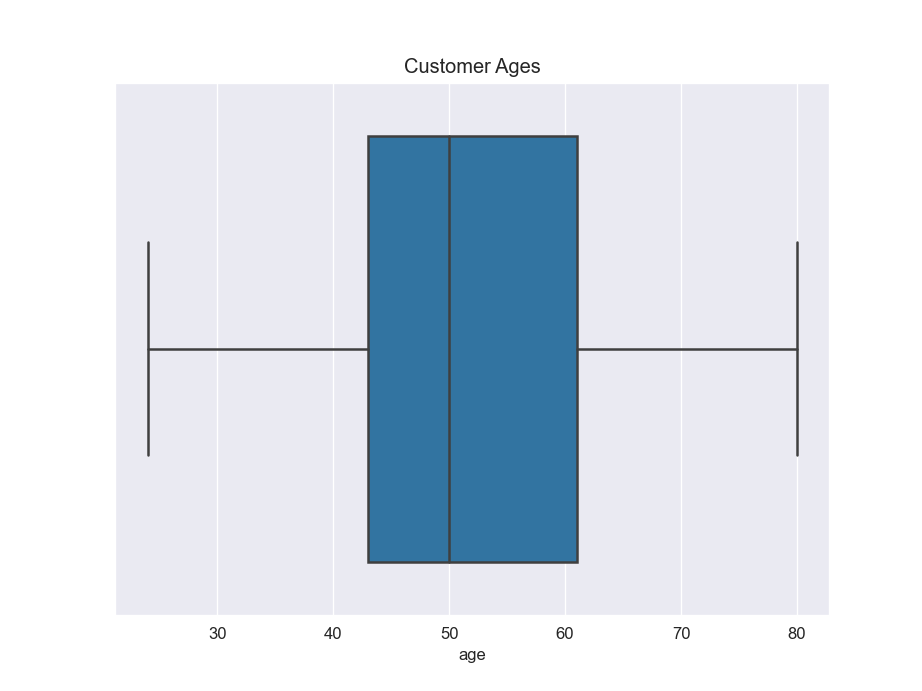

In [14]:
plt.figure()
sns.set_style('darkgrid')
sns.boxplot(data=marketing_data, x='age')
plt.title('Customer Ages')
plt.show()

After removing the major outliers the `age` distribution is symmetric and ready for analysis.

#### Checking the Education Variable <a class="anchor" id="section2_2"></a>

The education variable is another column that will be focused on in the analysis. A boxplot is used to see if any cleaning is needed before EDA. There is no missing data or other issues, so it can be left as is.

<IPython.core.display.Javascript object>


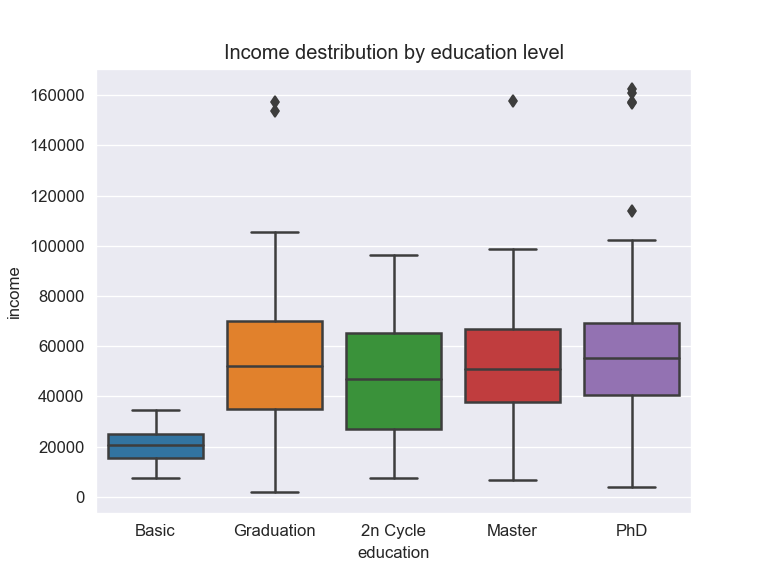

In [15]:
plt.figure()
sns.set_style('darkgrid')
sns.boxplot(data=marketing_data, x='education', y='income', order=["Basic", "Graduation", "2n Cycle", "Master", "PhD"])
plt.title('Income destribution by education level')
plt.show()

**Cheking the Marital Status variable**

In Marital Status variable we found "Absurd" and "YOLO" options, that don't make any sence, so we are removing them. Also option "Alone" is removed, but it's value is added to "Single" option. 

In [16]:
print(marketing_data.groupby('marital_status').count()['id'])
marketing_data.marital_status = marketing_data.marital_status.replace('Alone', 'Single')
marketing_data = marketing_data[~marketing_data.marital_status.isin(['Absurd', 'YOLO'])]
print(marketing_data.groupby('marital_status').count()['id'])

marital_status
Absurd        2
Alone         3
Divorced    231
Married     857
Single      470
Together    571
Widow        76
YOLO          2
Name: id, dtype: int64
marital_status
Divorced    231
Married     857
Single      473
Together    571
Widow        76
Name: id, dtype: int64


### Exploratory Data Analysis <a class="anchor" id="EDA"></a>

After some data cleaning and tidying, the DataFrame is ready for EDA. The following independent variables will be focused on in the analysis:
* `income`
* `education`
* `age`

The goal will be to see how these independent variables associate with the following dependent variables:
* `mnt_wines`
* `mnt_fruits`
* `mnt_meat_products`
* `mnt_fish_products`
* `mnt_sweet_products`  
* `mnt_gold_products`  
* `num_deals_purchases`
* `num_web_purchases`  
* `num_catalog_purchases`  
* `num_store_purchases`

The hope is that through summary statistics and visualizations the following question can be answered:
* Does a shopper's income, education level, and/or age relate to their purchasing behavior? 

Along the way, this question may be refined and more questions may pop up.

#### Big Picture <a class="anchor" id="section3_1">

In order to observe the dataset as a whole, `DataFrame.hist()` is used.. It gives a full view of all numerical variables in the distribution. Most of the amount bought and number purchased variables are skewed right and have similar distributions.

Next, correlations between all numerical variables are viewed using a heat matrix. The heat matrix shows that `income` has the strongest association with numerous variables. Interestingly, it showed that `age` may not be a huge factor overall. This is something to look into it a bit more in the analysis.

<IPython.core.display.Javascript object>


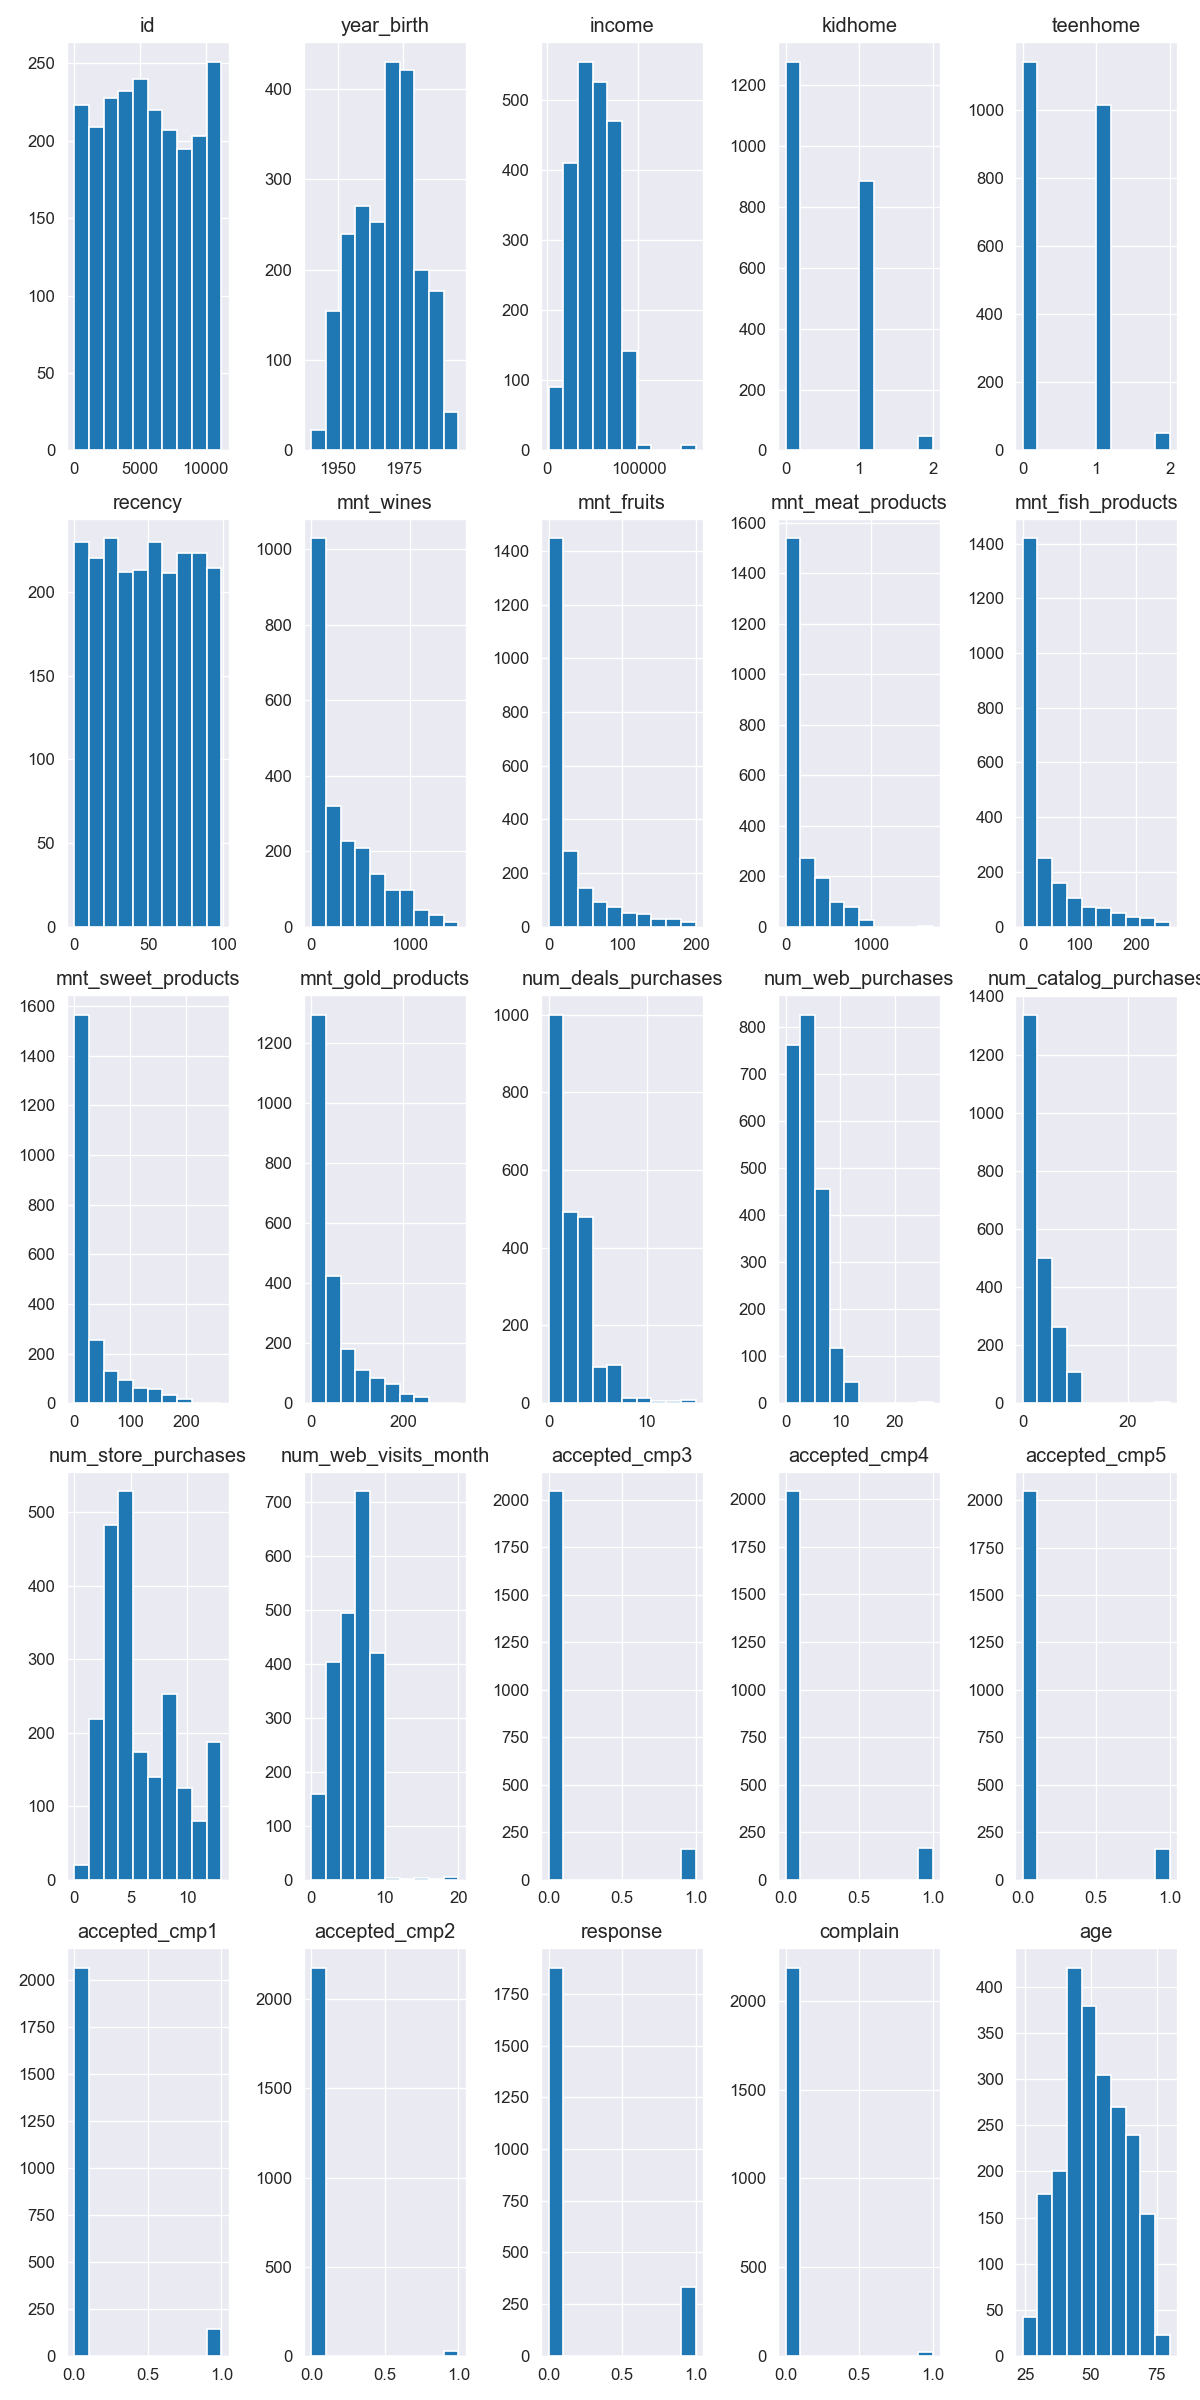

C:\Users\Owner\AppData\Local\Temp/ipykernel_9364/97275839.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  marketing_data.hist(ax = ax)


In [17]:
fig = plt.figure(figsize = (10,20))
sns.set_style('darkgrid')
ax = fig.gca()
marketing_data.hist(ax = ax)
plt.tight_layout()
plt.show();

This overview shows that the purchase behavior columns are all skewed to the right.

<IPython.core.display.Javascript object>


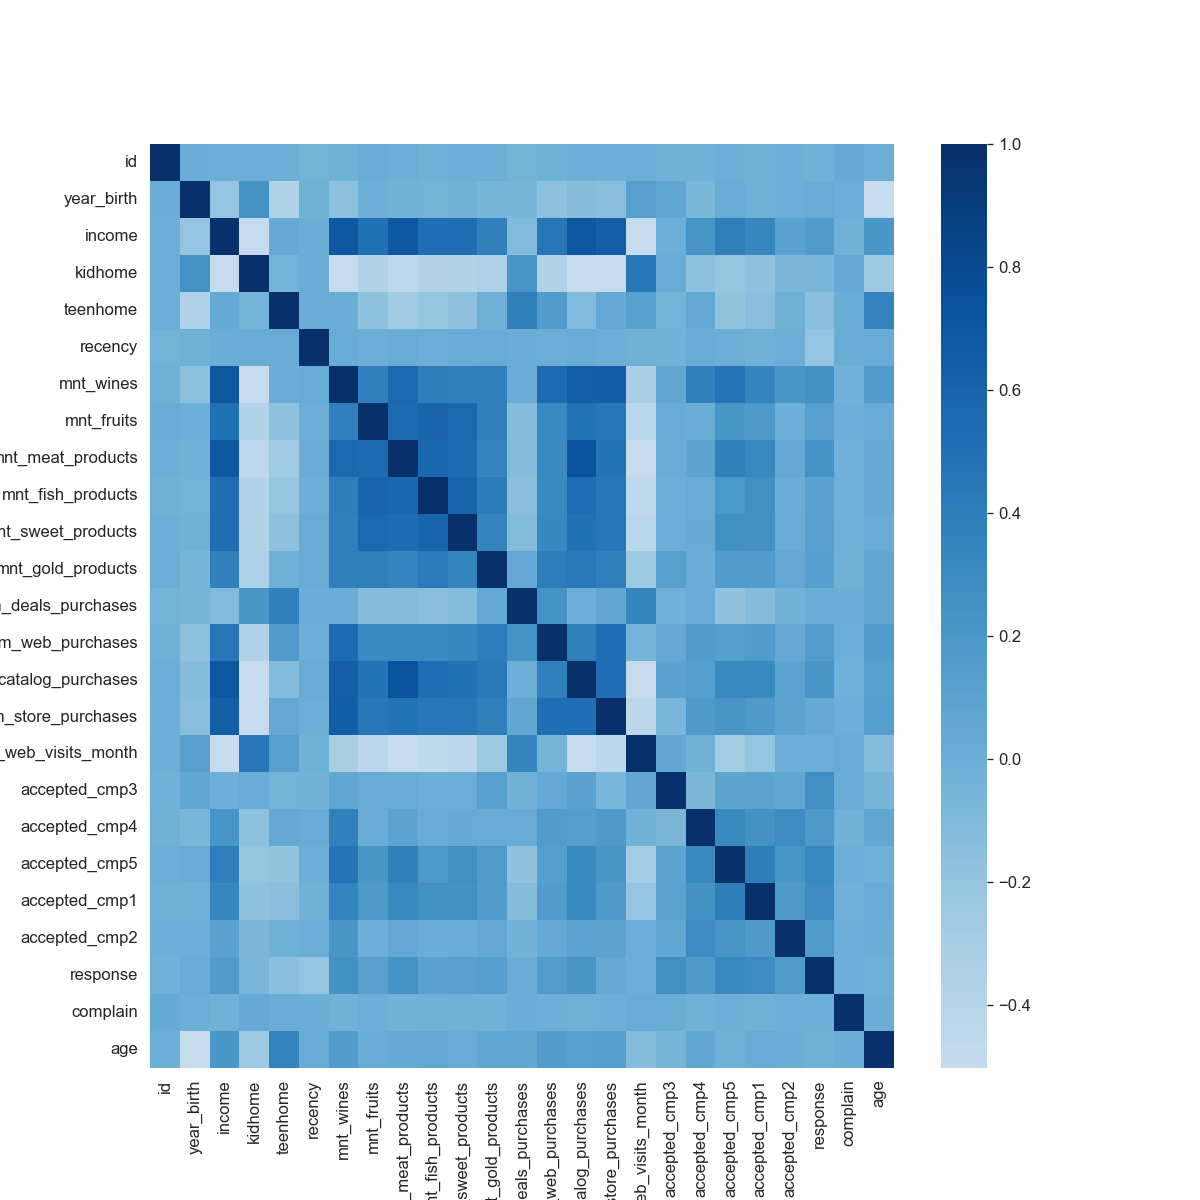

In [18]:
plt.figure(figsize=(10,10))
colors = sns.color_palette("Blues", as_cmap=True)
# heat matrix that shows correlation across all numerical variables
sns.heatmap(marketing_data.corr(), center=0, cmap=colors, robust=True)
plt.show()

The heat map shows that `income` will be the major variable to focus on in the analysis. 

#### Purchasing Behavior by Income <a class="anchor" id="section3_2"></a>

Now it's time to start looking into the big question. A `for` loop is used to see the relationship bewteen `income` and each `num_{type}_purchases` variable. The `hue` parameter with the `education` variable is used to see if there are any patterns that can be deciphered between `education` and `num_{type}_purchases`. 

First scatterplots are used and then regression plots are used for this analysis.

<IPython.core.display.Javascript object>


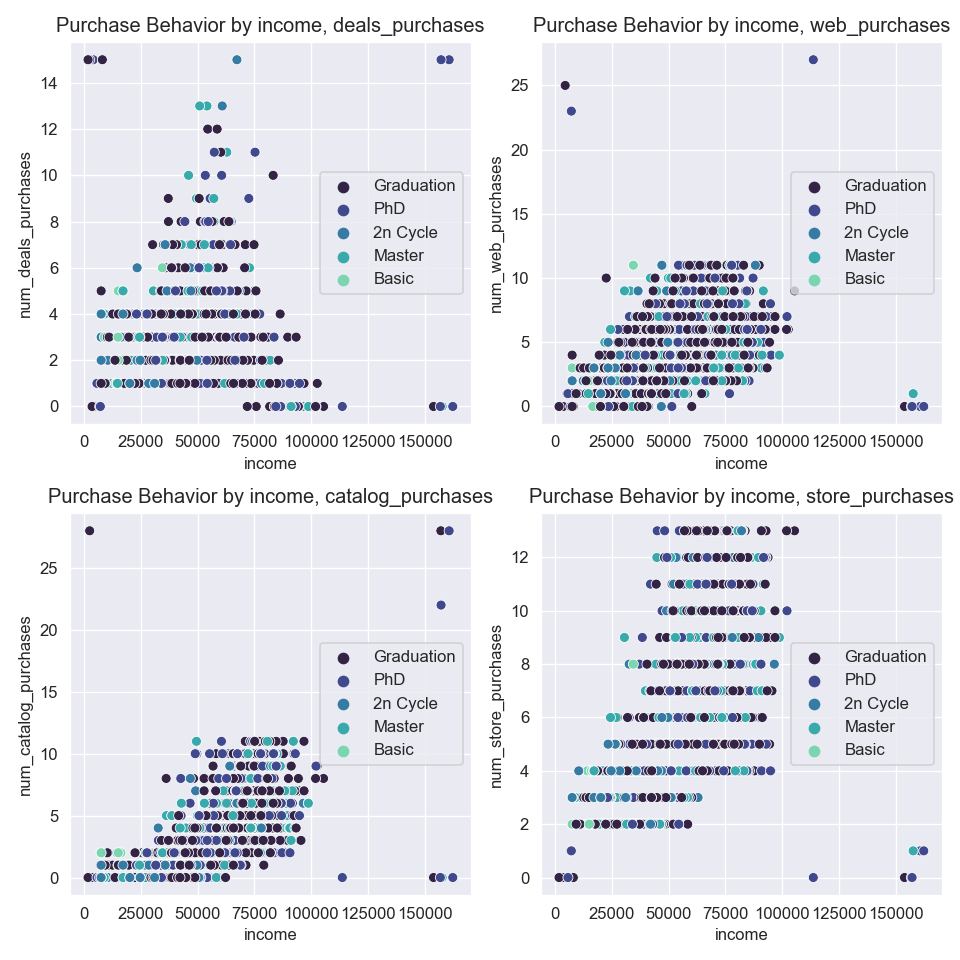

In [19]:
# num purchases columns list
num_purchases_cols = ["num_deals_purchases", "num_web_purchases", "num_catalog_purchases", "num_store_purchases"]
# keeps count of plot for subplots
plot = 0
fig = plt.figure(figsize=(8,8))
# loop through number of columns to plot
for i in range(len(num_purchases_cols)):
    plot += 1
    # subplot to create grid of plots
    sns.set_style('darkgrid')
    ax = plt.subplot(2, 2, plot)
    # scatterplot of purchase type vs income with education
    sns.scatterplot(x=marketing_data["income"], y= marketing_data[num_purchases_cols[i]], 
                    hue=marketing_data["education"], palette = 'mako')
    plt.title("Purchase Behavior by income, {}".format(num_purchases_cols[i].strip('num_')))
    plt.legend(loc=7)
plt.tight_layout()
plt.show()

There is a fairly strong, positive linear relationship between `income` and the following three variables:
* `num_catalog_purchases`
* `num_store_purchases`
* `num_web_purchases`

Between `income` and `NumDealsPurchaes`, however, there is no obvious relationship. It appears there might be a weak, negative linear relationship but it is not strong enough to be confident. It is also difficult to decipher any patterns associated with `education` in the plots, so further analysis will be done on this variable.

<IPython.core.display.Javascript object>


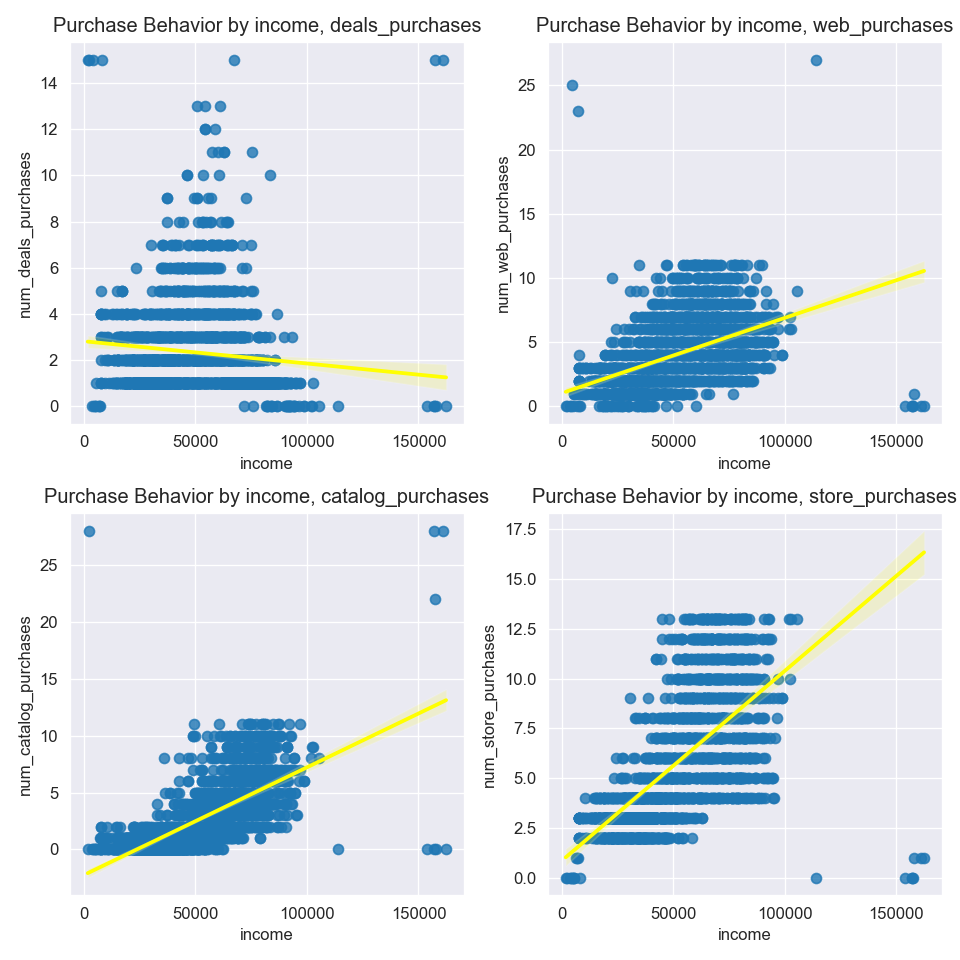

In [20]:
# num purchases columns list
num_purchases_cols = ["num_deals_purchases", "num_web_purchases", "num_catalog_purchases", "num_store_purchases"]
# keeps count of plot for subplots
plot = 0
fig = plt.figure(figsize=(8,8))
# loop through number of columns to plot
for i in range(len(num_purchases_cols)):
    plot += 1
    # subplot to create grid of plots
    sns.set_style('darkgrid')
    ax = plt.subplot(2, 2, plot)
    # scatterplot of purchase type vs income with education
    sns.regplot(x=marketing_data["income"], y= marketing_data[num_purchases_cols[i]], line_kws={"color": "yellow"})
    plt.title("Purchase Behavior by income, {}".format(num_purchases_cols[i].strip('num_')))

plt.tight_layout()
plt.show()

To get a better look at the linear relationships, `.regplot()` was used. `num_catalog_purchases` and `num_store_purchases` have the strongest positive, linear relationship with `income`. 

These plots also show that `income` and `num_deals_purchases` have a linear, negative relationship; however, it is still too weak to be conclusive.

For some further analysis, a new column in the DataFrame called `total_purchases` is added to the `marketing_data` DataFrame. It is the sum of all `num_{type}_purchases` variables. The same analysis with `.scatterplot()` and `.regplot()` plot methods is done on this new column.

In [21]:
# add new total_purchases column to marketing_data
marketing_data['total_purchases'] = marketing_data['num_deals_purchases'] + marketing_data['num_web_purchases'] + marketing_data['num_catalog_purchases'] + marketing_data['num_store_purchases']

<IPython.core.display.Javascript object>


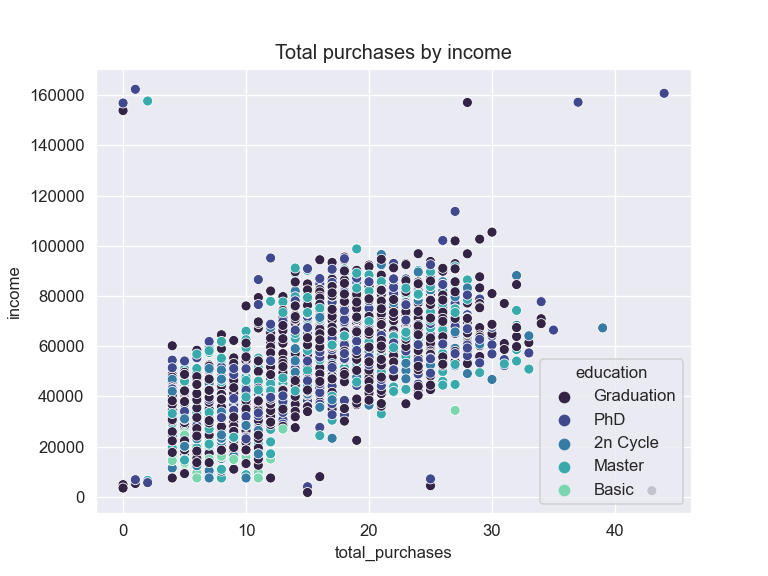

In [22]:
plt.figure()
sns.set_style('darkgrid')
# scatterplot of total_purchases vs. income
sns.scatterplot(x=marketing_data["total_purchases"], y= marketing_data['income'], hue=marketing_data['education'], palette = 'mako')
plt.title('Total purchases by income')
plt.show()

<IPython.core.display.Javascript object>


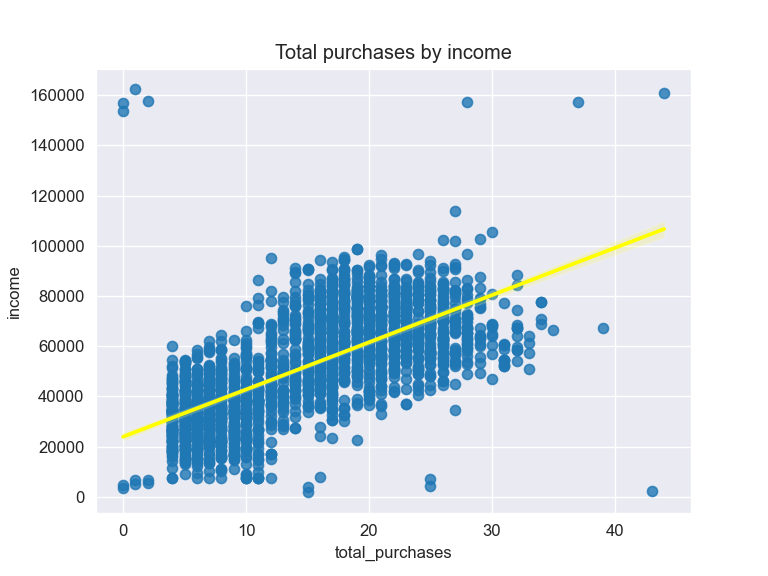

In [23]:
plt.figure()
sns.set_style('darkgrid')
# regression plot of total_purchases vs income
sns.regplot(x=marketing_data["total_purchases"], y= marketing_data['income'], line_kws={"color": "yellow"})
plt.title('Total purchases by income')
plt.show()

The overall relationship between `income` and `total_purchases` is strong and linear. Unfortunately, it is still hard to decipher any relationship with the `education` and `total_purchases` as the points are scattered randomly across the plot.

#### More Purchasing Behavior by Income <a class="anchor" id="section3_3"></a>

The following analysis is very similar as before. However, instead of looking at the relationship between `income` and `num_{type}_purchases`, this analysis will be looking at the relationship between `income` and `mnt_{type}_products`. The steps for this analysis will essentially be the same.

<IPython.core.display.Javascript object>


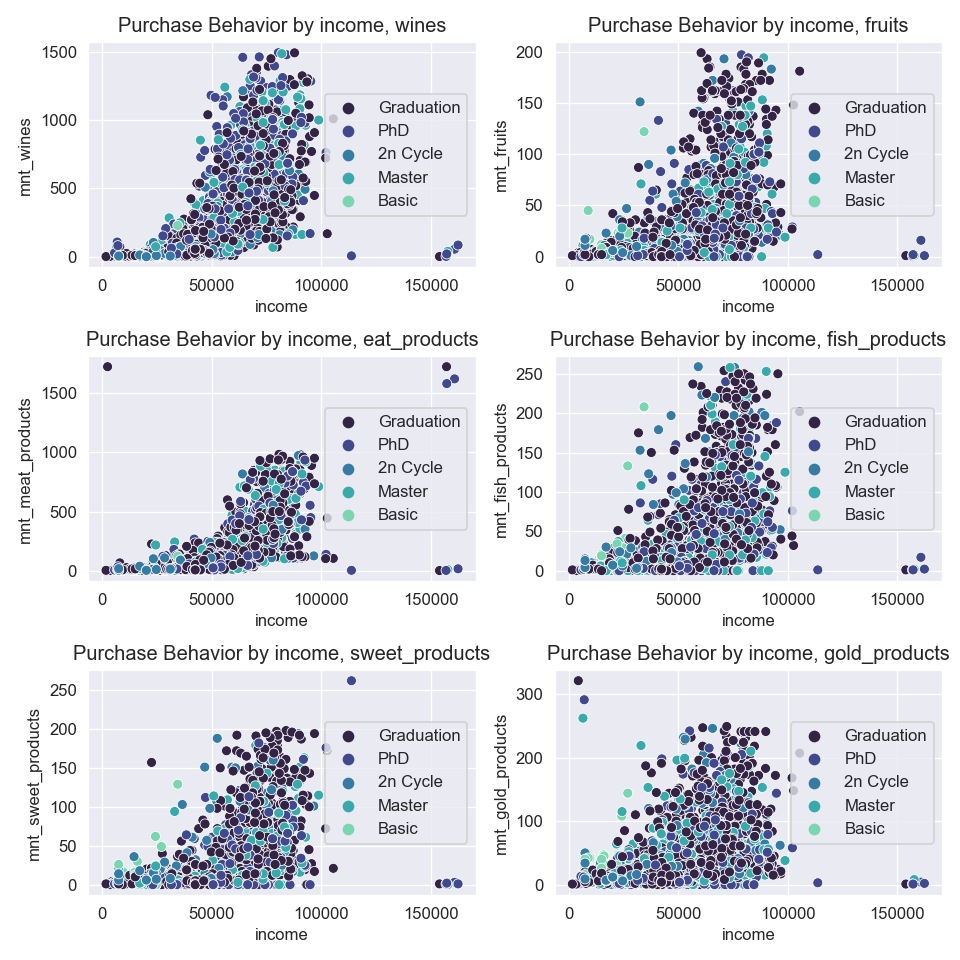

In [24]:
# amounts of items list
amounts_list = ["mnt_wines", "mnt_fruits", "mnt_meat_products", "mnt_fish_products", "mnt_sweet_products", "mnt_gold_products"]
# keeps count of plot for subplots
plot = 0
fig = plt.figure(figsize=(8,8))
sns.set_style('darkgrid')
# for loop to go through length of amounts list
for i in range(len(amounts_list)):
    plot += 1
    # subplot to create grid of plots
    ax = plt.subplot(3, 2, plot)
    # scatterplot of amount of items bought vs. income
    sns.scatterplot(x=marketing_data["income"], y= marketing_data[amounts_list[i]], hue=marketing_data["education"], 
                    palette="mako")
    plt.title("Purchase Behavior by income, {}".format(amounts_list[i].strip('mnt_')))
    plt.legend(loc=7)
plt.tight_layout()
plt.show()   

These plots all show a positive relationship between `income` and each `mnt_{type}_products` variable. However, there is not enough visual evidence to see that it is linear. 

#### Purchasing Behavior by Education and Income <a class="anchor" id="section3_4"></a>

A seaborn method called `.FacetGrid()` is used to see how education effects purchasing behavior along with `income`. It gives a much clearer picture than the `hue` parameter in previous plots. In this analysis, a loop and a dynamic Python variable are used to plot six sets of `.FacetGrid()` plots.

<IPython.core.display.Javascript object>


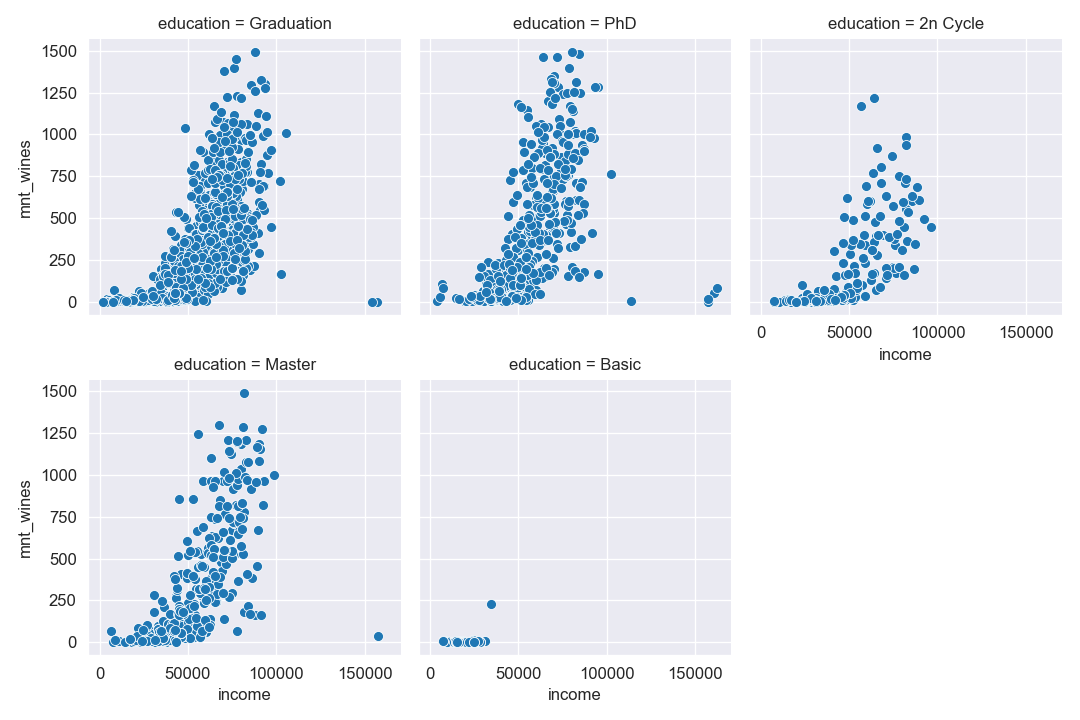

<IPython.core.display.Javascript object>


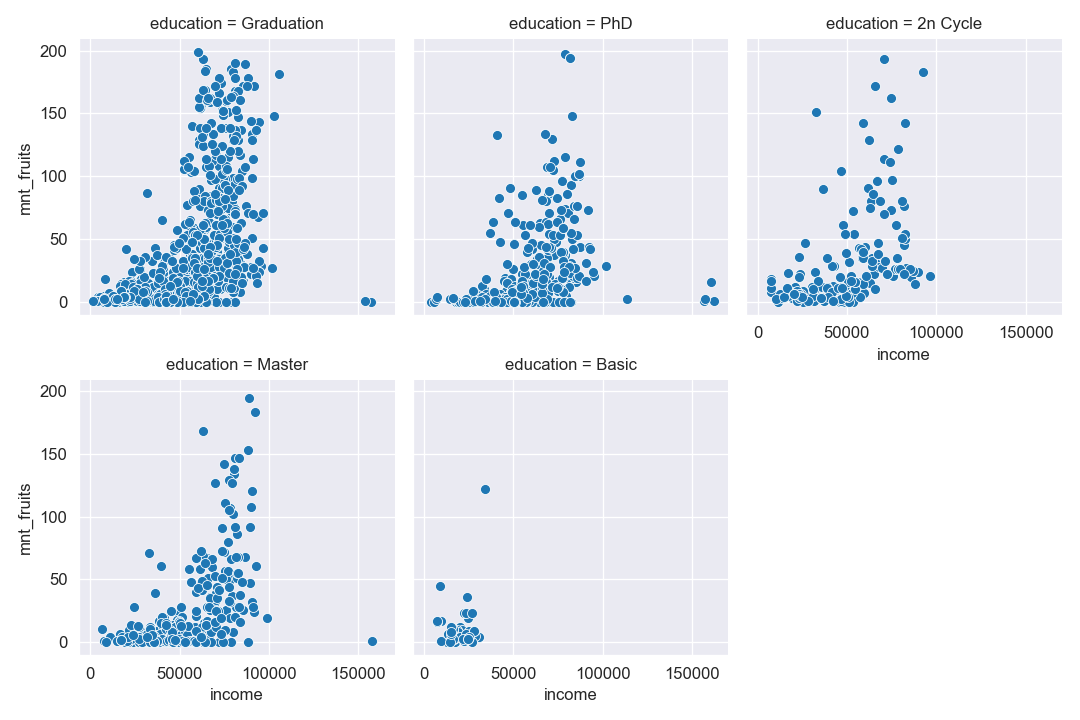

<IPython.core.display.Javascript object>


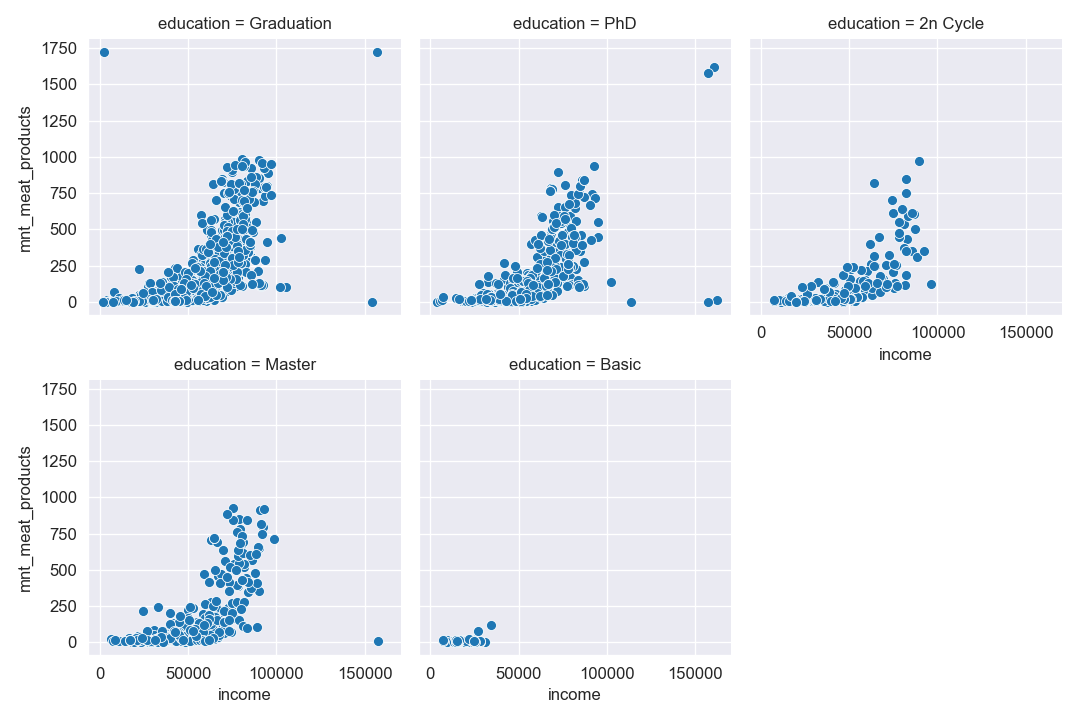

<IPython.core.display.Javascript object>


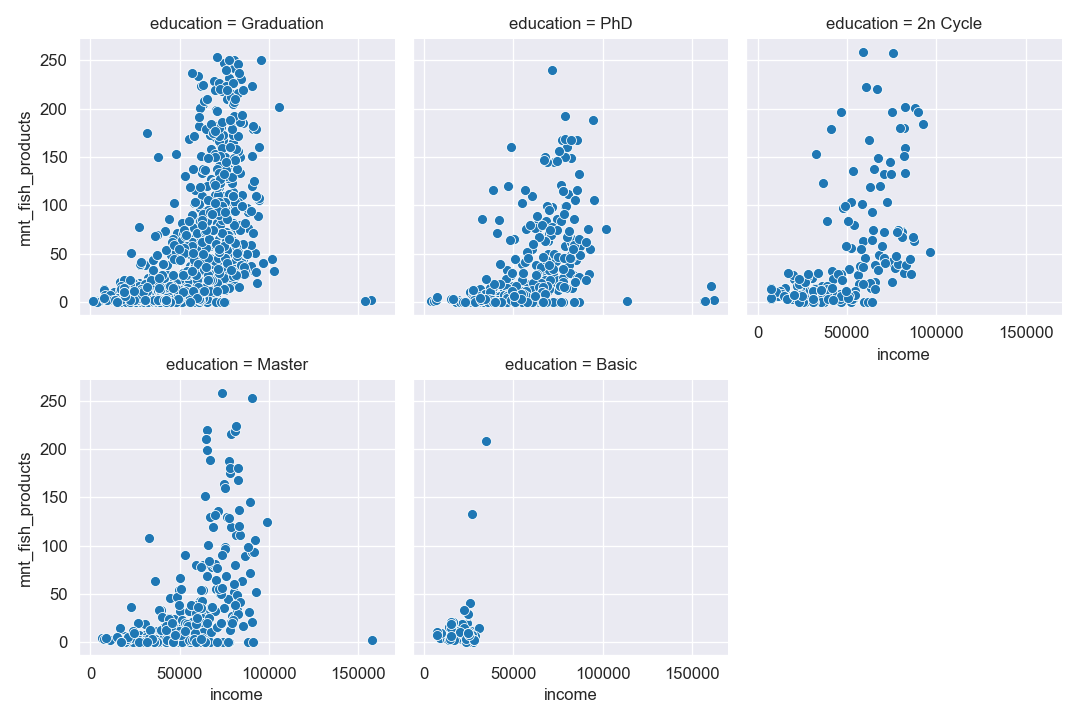

<IPython.core.display.Javascript object>


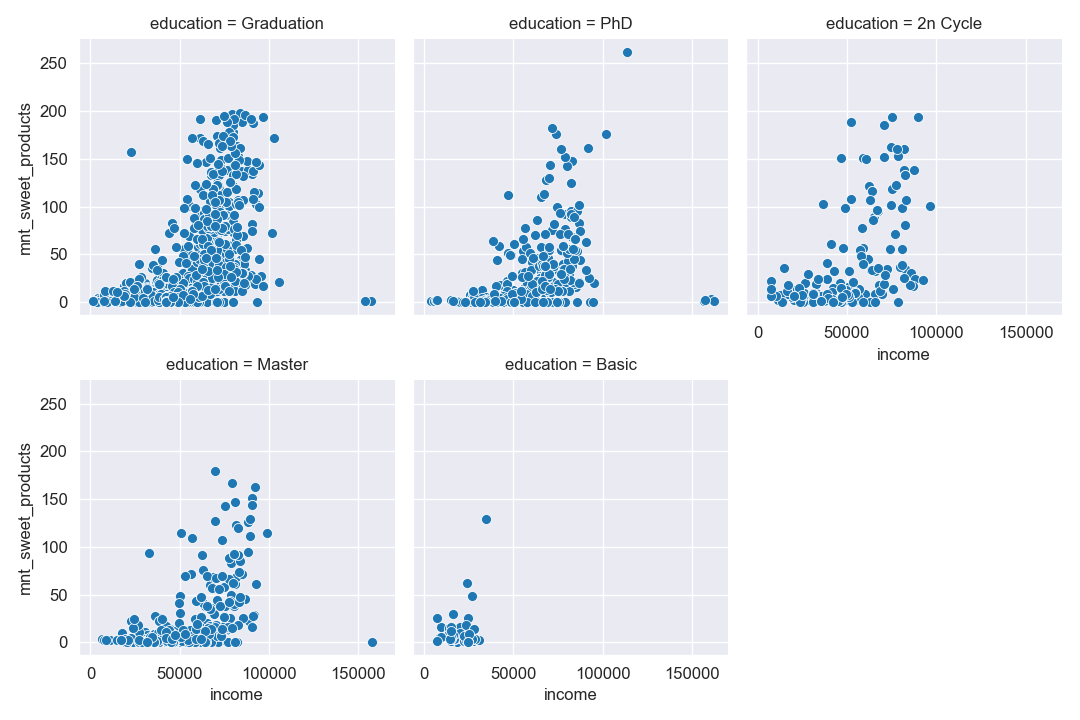

<IPython.core.display.Javascript object>


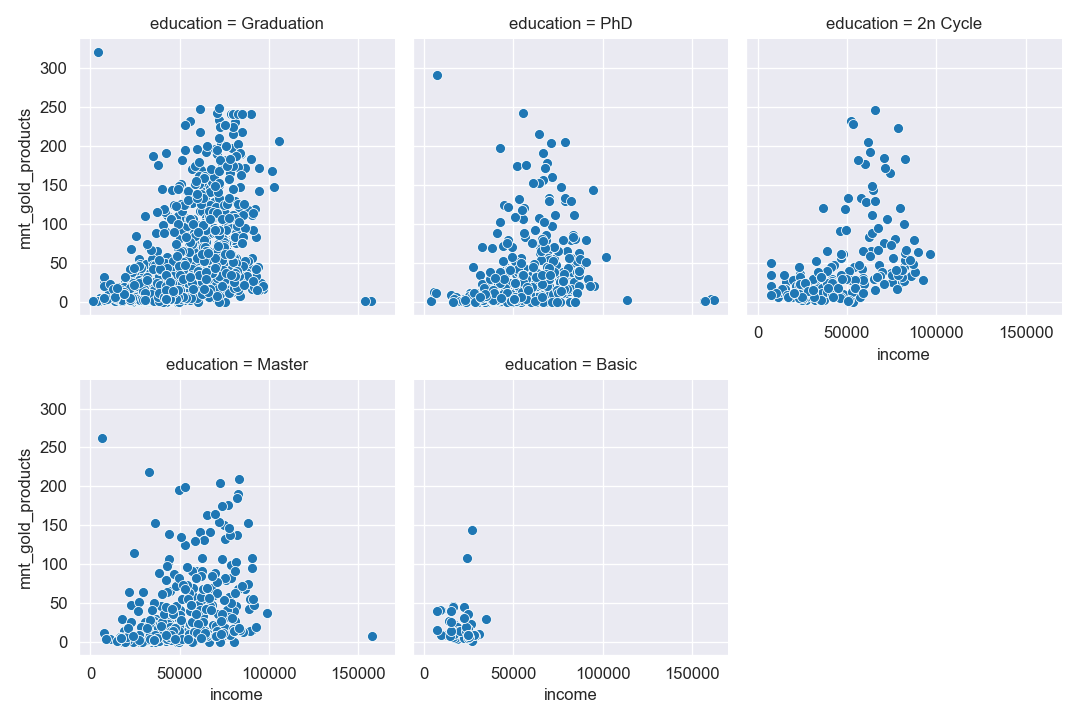

In [25]:
# dictionary used to contain dynamic variables
variable_names = {}
#amounts columns list
amounts_list = ["mnt_wines", "mnt_fruits", "mnt_meat_products", "mnt_fish_products", "mnt_sweet_products", "mnt_gold_products"]
sns.set_style('darkgrid')

for i in range(6):
    # defining the facet grid
    variable_names["g{0}".format(i)] = sns.FacetGrid(marketing_data, col="education", col_wrap=3)
    # mapping the facet grid with scatterplots of amounts product vs. income
    variable_names["g{0}".format(i)].map(sns.scatterplot, "income", amounts_list[i])
    
plt.show()

After observing the plots detailing the relationship between income, education, and purchasing behavior, the following can be seen:
* This store does not have many shoppers with a `Basic` education level.
* Regardless of the shopper's educational level, there is a positive, linear relationship for each `mnt_{type}_products`.
* `mnt_wines` has the strongest positive, linear relationship with `education` by `income`.

#### Purchasing Behavior by Age <a class="anchor" id="section3_5"></a>

The last main variable in our analysis plan is `age`. The `.scatterplot()` method is used to see if there is any relationship bewteen `age` and any purchasing behavior variables. The initial analysis showed no evidence of relationship as shown in all the graphs below. The graphs shown are:
* `total_purchases` vs. `age`
* `mnt_{type}_products` vs. `age`
* `num_{type}_purchases` vs. `age`

The process used to plot each one of these graphs is very similar to the one outlined in the Purchasing Behavior by income section.

<IPython.core.display.Javascript object>


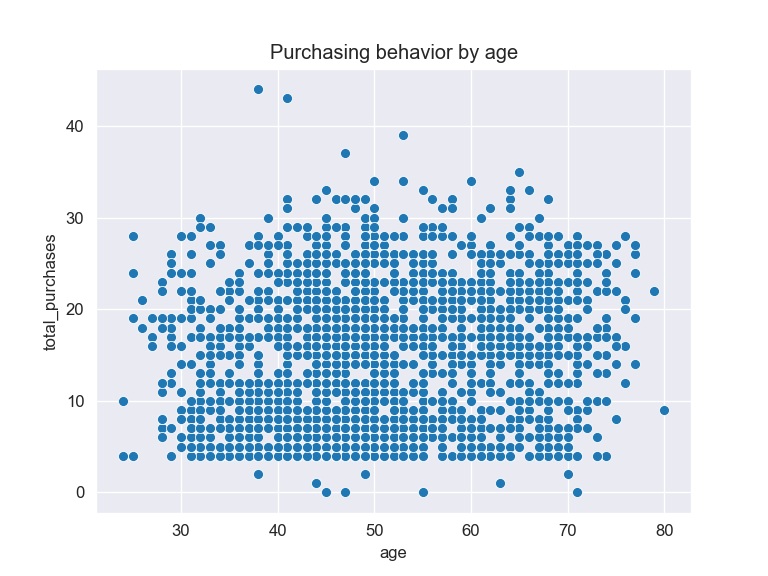

In [26]:
plt.figure()
sns.set_style('darkgrid')
# scatterplot of total_purchases vs. age
sns.scatterplot(y=marketing_data["total_purchases"], x= marketing_data['age'])
plt.title('Purchasing behavior by age')
plt.show()

It is hard to see any relationship between `age` and `total_purchases` in this plot.

<IPython.core.display.Javascript object>


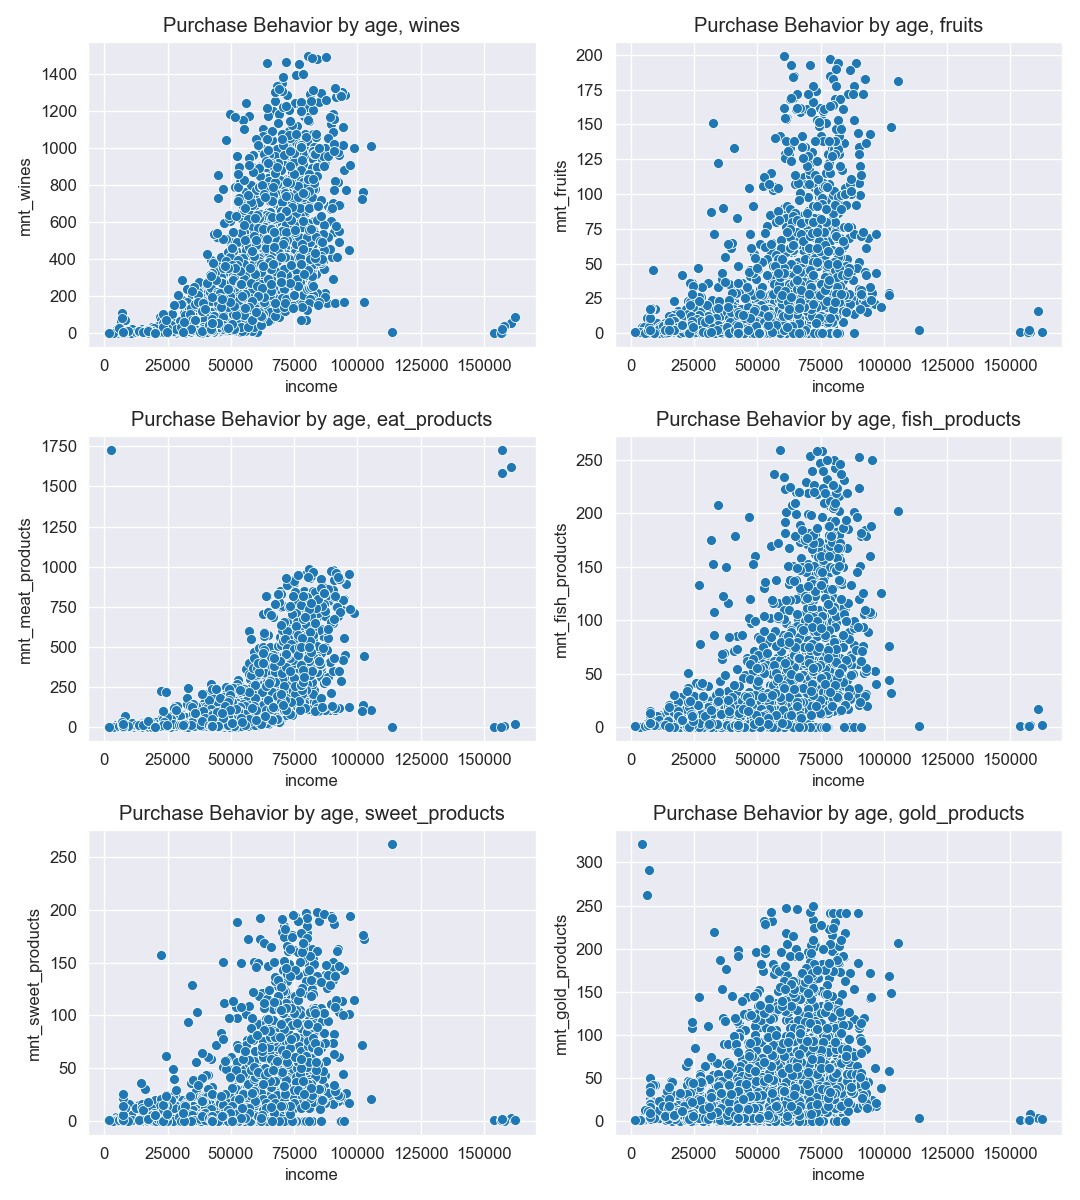

In [27]:
# amounts of items list
amounts_list = ["mnt_wines", "mnt_fruits", "mnt_meat_products", "mnt_fish_products", "mnt_sweet_products", "mnt_gold_products"]
# keeps count of plot for subplots
plot = 0
fig = plt.figure(figsize=(9,10))
sns.set_style('darkgrid')
# for loop to go through length of amounts list
for i in range(len(amounts_list)):
    plot += 1
    # subplot to create grid of plots
    ax = plt.subplot(3, 2, plot)
    # scatterplot of amount of items bought vs. age
    sns.scatterplot(x=marketing_data["income"], y= marketing_data[amounts_list[i]])
    plt.title("Purchase Behavior by age, {}".format(amounts_list[i].strip('mnt_')))

plt.tight_layout()
plt.show()    

Again, it is difficult to decipher any pattern between `age` and any `mnt_{type}_products` in any of these plots. A different strategy may be useful to analyze `age`.

<IPython.core.display.Javascript object>


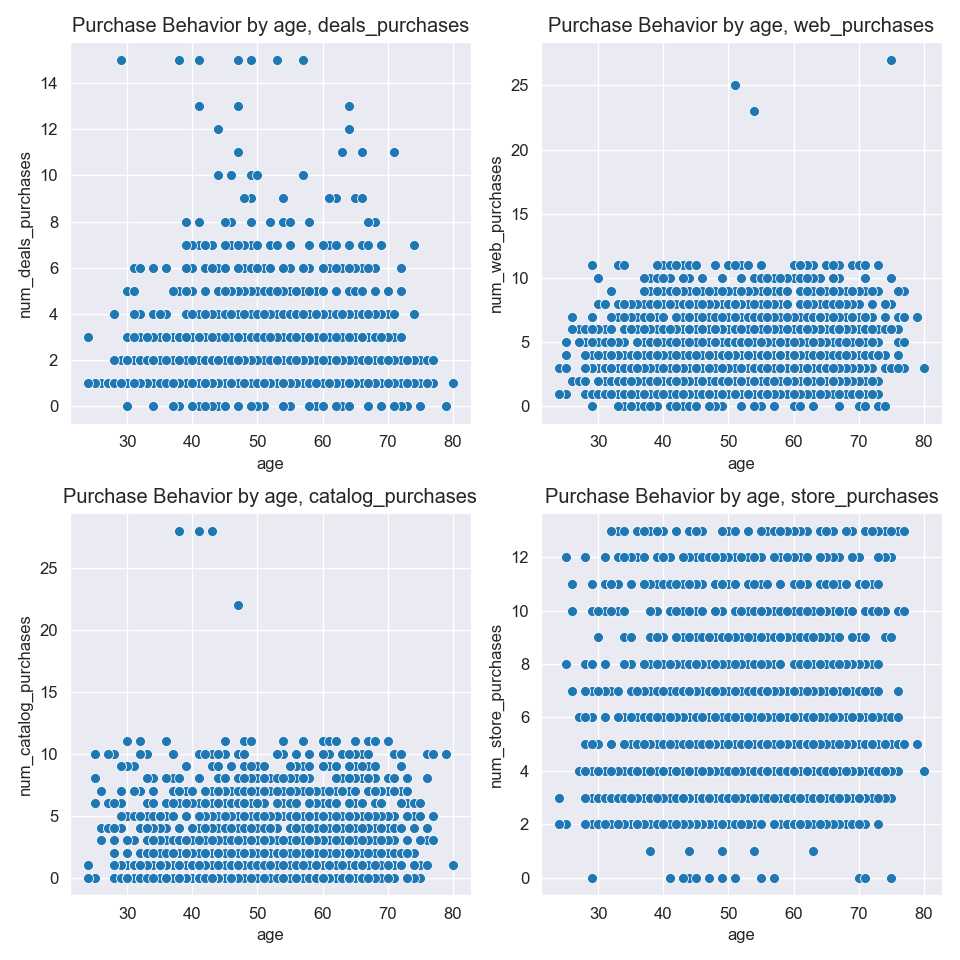

In [28]:
# num purchases columns list
num_purchases_cols = ["num_deals_purchases", "num_web_purchases", "num_catalog_purchases", "num_store_purchases"]
# keeps count of plot for subplots
plot = 0
fig = plt.figure(figsize=(8,8))
# loop through number of columns to plot
for i in range(len(num_purchases_cols)):
    plot += 1
    # subplot to create grid of plots
    sns.set_style('darkgrid')
    ax = plt.subplot(2, 2, plot)
    # scatterplot of purchase type vs age
    sns.scatterplot(x=marketing_data["age"], y= marketing_data[num_purchases_cols[i]])
    plt.title("Purchase Behavior by age, {}".format(num_purchases_cols[i].strip('num_')))

plt.tight_layout()
plt.show()

It is also difficult to decipher any pattern between `age` and any `num_{type}_purchases` in any of these plots. Because of this, a different analysis strategy will be used on the `age` variable.

To do further analysis on the `age` variable, A new column called `age_group` is added to `marketing_data`. It contains the following categories of ages:
* `18 to 35`
* `36 to 50`
* `51 to 70`
* `71 and Older`

This categorical variables may give a more clear story.

In [29]:
# function that breaks up each age into a group
def age_groups(age):
    if 18 <= age <= 35:
        return "18 to 35"
    elif 36 <= age <= 50:
        return "36 to 50"
    elif 51 <= age <= 70:
        return "51 to 70"
    else:
        return "71 and Older"

# applying the function to the dataframe
marketing_data['age_group'] = marketing_data.age.apply(age_groups)
    

<IPython.core.display.Javascript object>


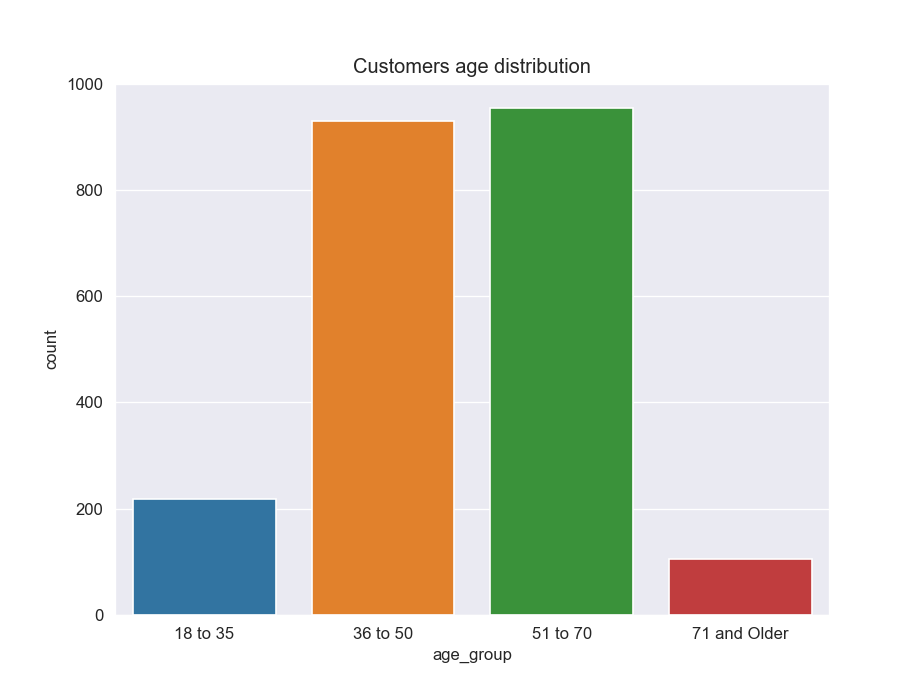

In [30]:
# plotting the age Group variable in a bar chart
plt.figure()
sns.set_style('darkgrid')
sns.countplot(x=marketing_data['age_group'], order=['18 to 35', '36 to 50', '51 to 70', '71 and Older'])
plt.title('Customers age distribution')
plt.show()

The `age_group` variable proved to be much more useful quickly as a bar chart showed that `36 to 50` and `51 to 70` year-old age groups dominated shopping at the store.

To take the analysis further, a new DataFrame is created, which only has information about shopper age (`age` and `age_group`) and the total purchase amounts each age group buys (`mnt_{type}_products`). This new DataFrame will have `age_groups` as row data to make plotting a grouped bar graph easier.

In [31]:
# new dataframe that is age and purchase amounts columns
age_and_amounts = marketing_data.loc[:, ('age', 'mnt_wines', 'mnt_fruits', 'mnt_meat_products', 'mnt_fish_products', 'mnt_sweet_products', 'mnt_gold_products')]
# breaking up the age bins
bins = [18, 35, 50, 70, 130]
# age group labels
labels = ['18 to 35', '36 to 50', '51 to 70', '71 and Older']

# adding age group to the new dataframe as rows
age_and_amounts['age_group'] = pd.cut(age_and_amounts.age, bins = bins, labels = labels)
age_and_amounts = age_and_amounts.groupby('age_group').sum().reset_index()


In [32]:
print(age_and_amounts)

      age_group    age  mnt_wines  mnt_fruits  mnt_meat_products  \
0      18 to 35   6930      55567        6540              44849   
1      36 to 50  40980     236883       22547             137496   
2      51 to 70  57162     328782       25269             159119   
3  71 and Older   7747      52709        3710              27281   

   mnt_fish_products  mnt_sweet_products  mnt_gold_products  
0               8589                6587               9026  
1              32295               23725              36966  
2              36200               25433              45835  
3               5776                4015               4845  


<IPython.core.display.Javascript object>


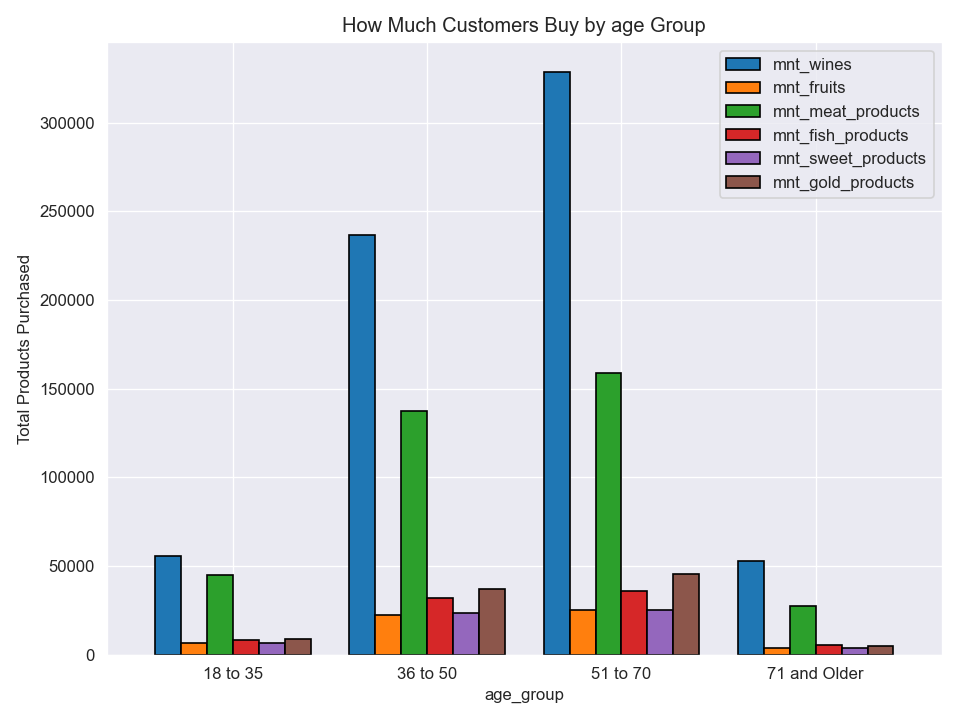

In [34]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.set_style('darkgrid')

col_products = [
'mnt_wines', 
'mnt_fruits', 
'mnt_meat_products', 
'mnt_fish_products', 
'mnt_sweet_products', 
'mnt_gold_products'
]

# bar graph of amount of items bought in the store grouped by age group
age_and_amounts.plot(x='age_group', y=col_products, kind='bar', ax=ax,  width=0.8, edgecolor='black')
plt.title("How Much Customers Buy by age Group")
plt.ylabel("Total Products Purchased")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Across the board, `age_group` does not seem to effect purchasing habits. Wine is the most popular bought item for each age group followed by meat products. The least popular bought item is fruits for each age group. The next analysis of interest is to see if `age_group` affects how many items customers buy each time. 

<IPython.core.display.Javascript object>


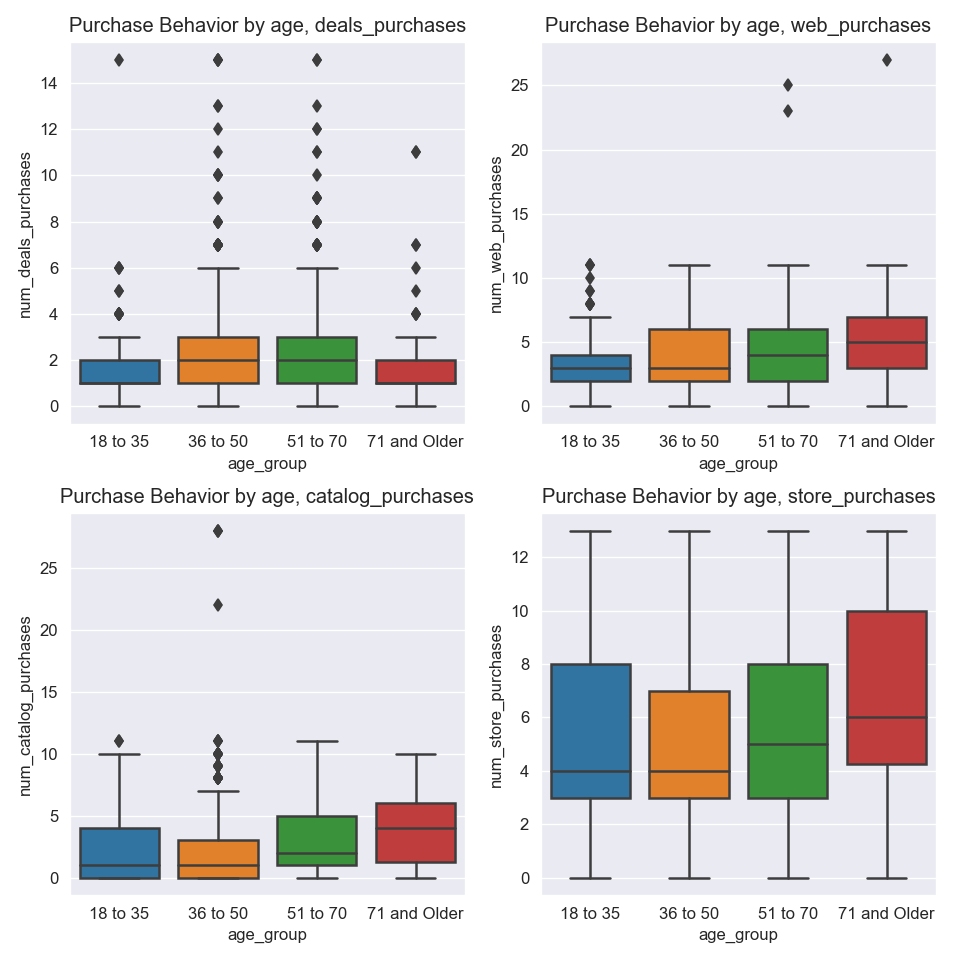

In [35]:
# num purchases columns list
num_purchases_cols = ["num_deals_purchases", "num_web_purchases", "num_catalog_purchases", "num_store_purchases"]
plot = 0
fig = plt.figure(figsize=(8,8))
sns.set_style('darkgrid')
# looping through the length of the list
for i in range(len(num_purchases_cols)):
    plot += 1
    # setting up the subplots
    ax = plt.subplot(2, 2, plot)
    # boxplot of of num purchases vs. age
    sns.boxplot(x=marketing_data["age_group"], y= marketing_data[num_purchases_cols[i]], order=["18 to 35", "36 to 50", "51 to 70", "71 and Older"])
    plt.title("Purchase Behavior by age, {}".format(num_purchases_cols[i].strip('num_')))

plt.tight_layout()
plt.show()

This chart yields some very interesting insights. Here are some notable ones:
* `18 to 35` and `71 and Older` age groups tend to be the least interested in deals.
* On average, `71 and Older` age group customers tend to shop the most online, in store, and through the catalog.
* `36 to 50` and `51 to 70` age groups are interested in deals. Most likely this is because they receive more deals since they have more loyal customers.

This information could be super helpful for a marketing department as strategies could be used to increase `18 to 35` and `71 and Older` customers for the store.

**Purchasing behavior by marital status**<a class="anchor" id="section3_6"></a>

Next variable in our analysis is marital status. The `.barplot()` method is used to see if there is any relationship bewteen marital status and any purchasing behavior variables. The initial analysis showed no evidence of relationship as shown in all the graphs below. The graphs shown are:

    total_purchases vs. marital_status
    mnt_{type}_products vs. marital_status
    num_{type}_purchases vs. marital_status
    
First of all, we use `.countplot()` method to see customers marital status distribution.

<IPython.core.display.Javascript object>


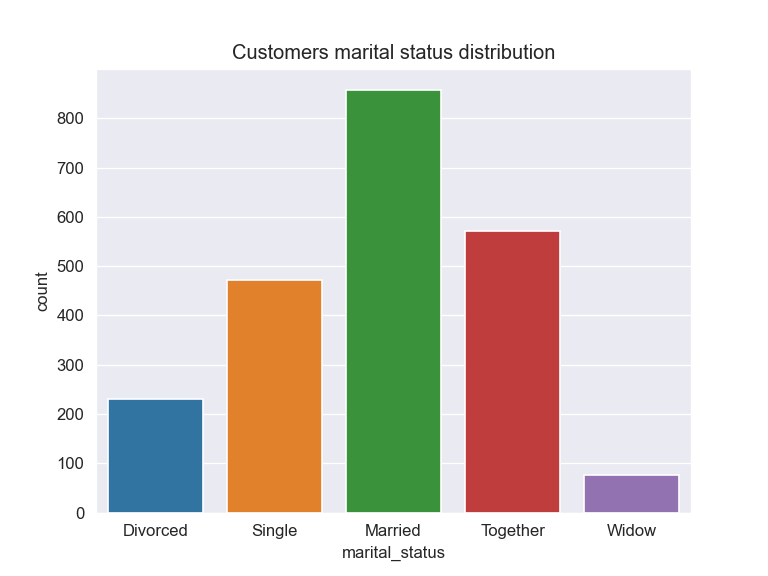

In [36]:
# plotting the marital status variable in a bar chart
plt.figure()
sns.set_style('darkgrid')
sns.countplot(x=marketing_data['marital_status'])
plt.title('Customers marital status distribution')
plt.show()

Most of the customers of the store are maried. 

To check relationship between marital status and total purchases count we use `.barplot()` method.

<IPython.core.display.Javascript object>


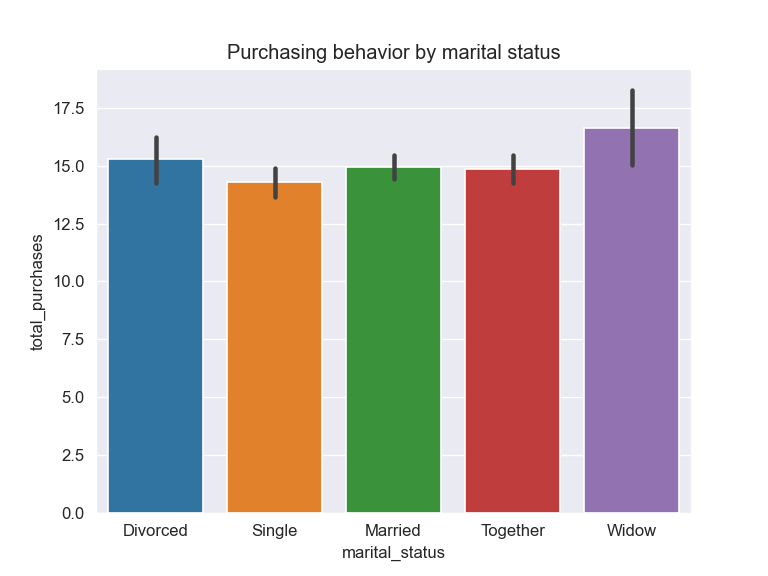

In [37]:
plt.figure()
sns.set_style('darkgrid')
# barplot of total_purchases vs. marital status
sns.barplot(y=marketing_data["total_purchases"], x= marketing_data['marital_status'])
plt.title('Purchasing behavior by marital status')
plt.show()

Here we can see, that there is no significant difference between total purchases count, but widows tend to shop more frequently. 

The next analysis of interest is to see if  `marital_status ` affects how many items customers buy each time. 

<IPython.core.display.Javascript object>


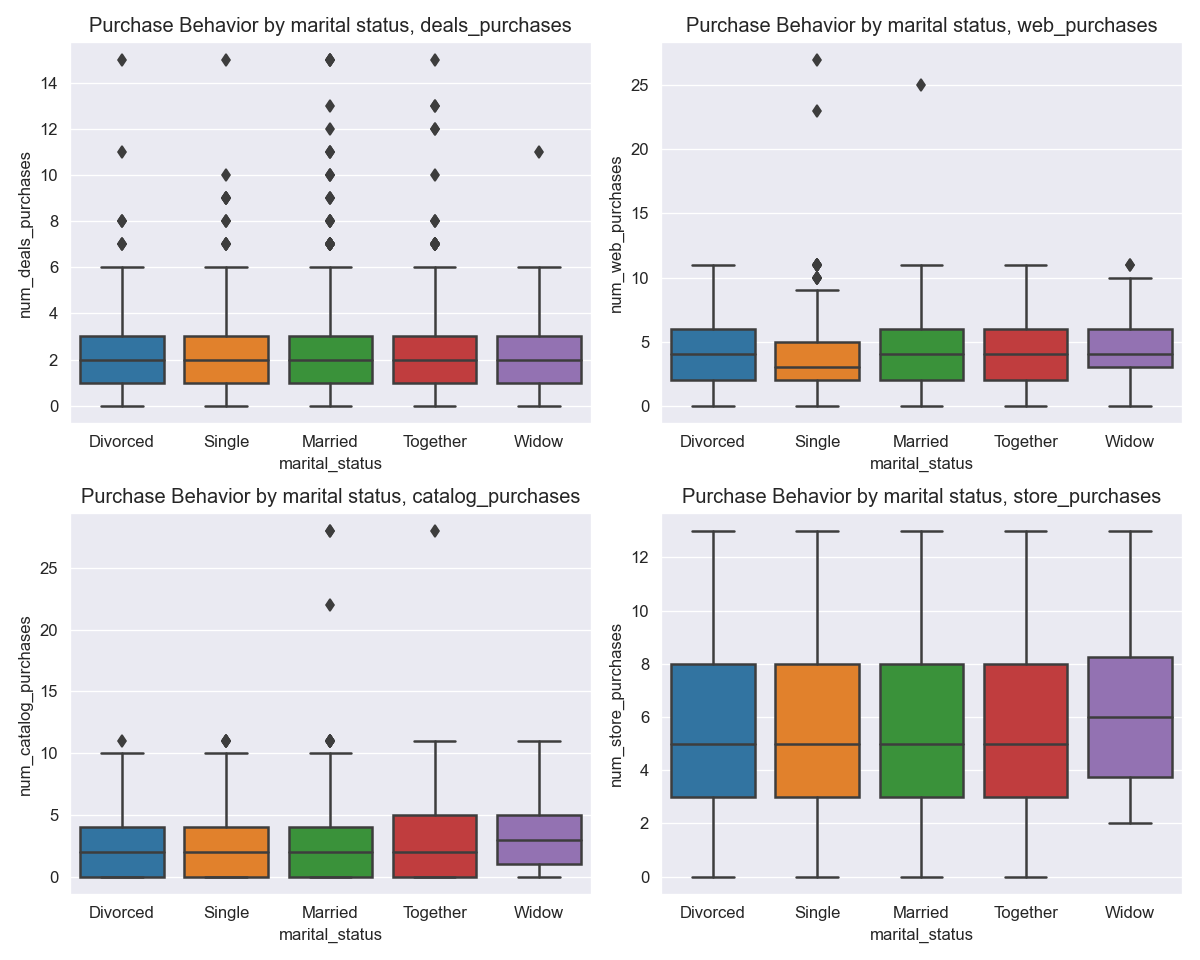

In [38]:
# num purchases columns list
num_purchases_cols = ["num_deals_purchases", "num_web_purchases", "num_catalog_purchases", "num_store_purchases"]
plot = 0
fig = plt.figure(figsize=(10,8))
sns.set_style('darkgrid')
# looping through the length of the list
for i in range(len(num_purchases_cols)):
    plot += 1
    # setting up the subplots
    ax = plt.subplot(2, 2, plot)
    # boxplot of of num purchases vs. marital status
    sns.boxplot(x=marketing_data["marital_status"], y= marketing_data[num_purchases_cols[i]])
    plt.title("Purchase Behavior by marital status, {}".format(num_purchases_cols[i].strip('num_')))

plt.tight_layout()
plt.show()

As there is no significant difference in purchase behavior between marital status groups, we can still notice, that people in relationships (`Maried` and `Together`) are more interested in deal purchases, then the others. At the same time `Widow` are slightly more interested in store purchases and catalog purchases.   

To take the analysis further, a new DataFrame is created, which only has information about shopper marital status and the total purchase amounts each group buys (mnt_{type}_products). This new DataFrame will have marital_status as row data to make plotting a grouped bar graph easier.

In [39]:
marital_and_amounts = marketing_data.loc[:, ('marital_status', 'mnt_wines', 'mnt_fruits', 'mnt_meat_products',\
                                             'mnt_fish_products', 'mnt_sweet_products', 'mnt_gold_products')]
marital_and_amounts = marital_and_amounts.groupby('marital_status').sum().reset_index()

<IPython.core.display.Javascript object>


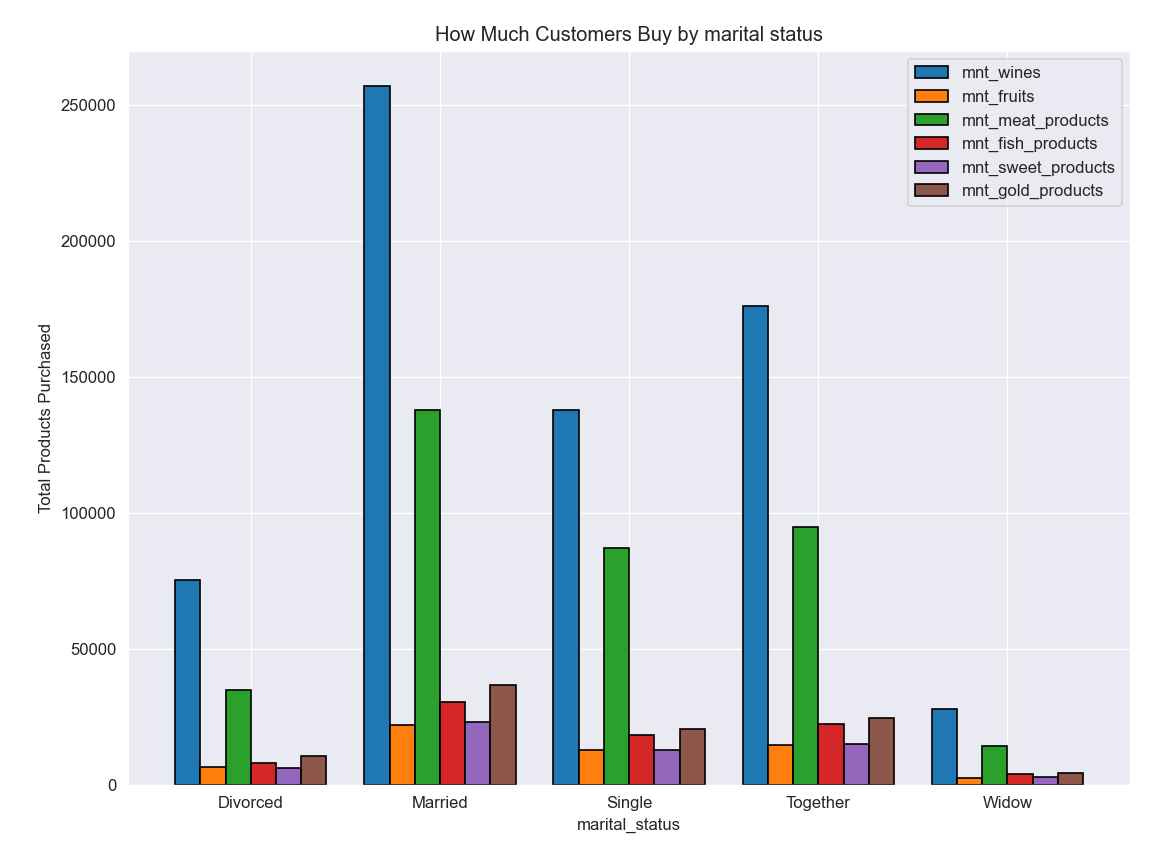

In [41]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.set_style('darkgrid')

col_products = [
'mnt_wines', 
'mnt_fruits', 
'mnt_meat_products', 
'mnt_fish_products', 
'mnt_sweet_products', 
'mnt_gold_products'
]

# bar graph of amount of items bought in the store grouped by marital status
marital_and_amounts.plot(x='marital_status', y=col_products, kind='bar', ax=ax,  width=0.8, edgecolor='black')
plt.title("How Much Customers Buy by marital status")
plt.ylabel("Total Products Purchased")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Across the board, marital_status seem to effect purchasing habits. We can see, that people in relationships (`Maried` and `Together`) tend to buy more, especially big difference can be seen in wine and meat products purchases. `Maried` customers buy most wines of all. The least popular bought item is fruits for each age group. 

**Purchasing behavior by childrean amount**<a class="anchor" id="section3_7"></a>

Next variable in our analysis is amount of children, that customers have. The `.barplot()` method is used to see if there is any relationship bewteen childrean amount and any purchasing behavior variables. The initial analysis showed no evidence of relationship as shown in all the graphs below. The graphs shown are:

    total_purchases vs. total_children
    mnt_{type}_products vs. total_children
    num_{type}_purchases vs. total_children
    
First of all, we make new column with total children amount by adding `kidhome` and `teenhome` values. Next we use `.countplot()` method to see customers childrean amount distribution.

In [42]:
marketing_data['total_children'] = marketing_data['kidhome'] + marketing_data['teenhome']


<IPython.core.display.Javascript object>


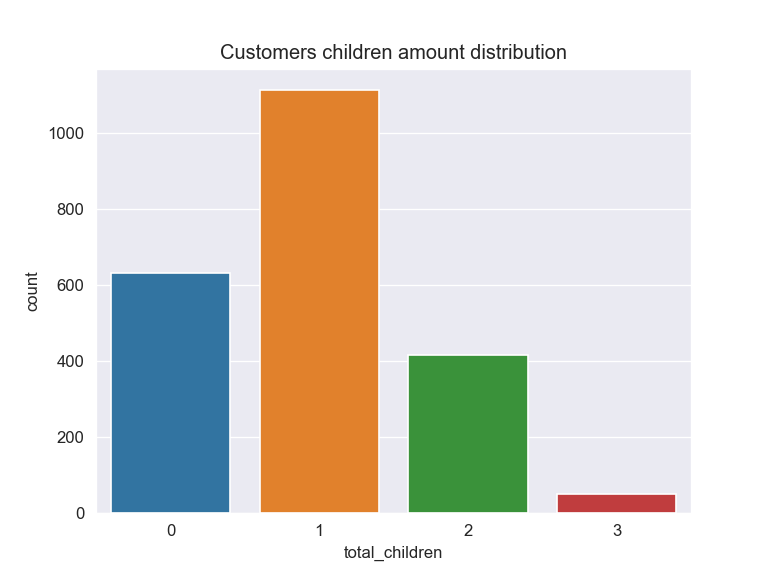

In [43]:
# plotting the total children variable in a bar chart
plt.figure()
sns.set_style('darkgrid')
sns.countplot(x=marketing_data['total_children'])
plt.title('Customers children amount distribution')
plt.show()

Most customers of the store have 1 child. Maximum and least represented children amount is 3 kids.

To check relationship between total children and total purchases count we use `.barplot()` method.

<IPython.core.display.Javascript object>


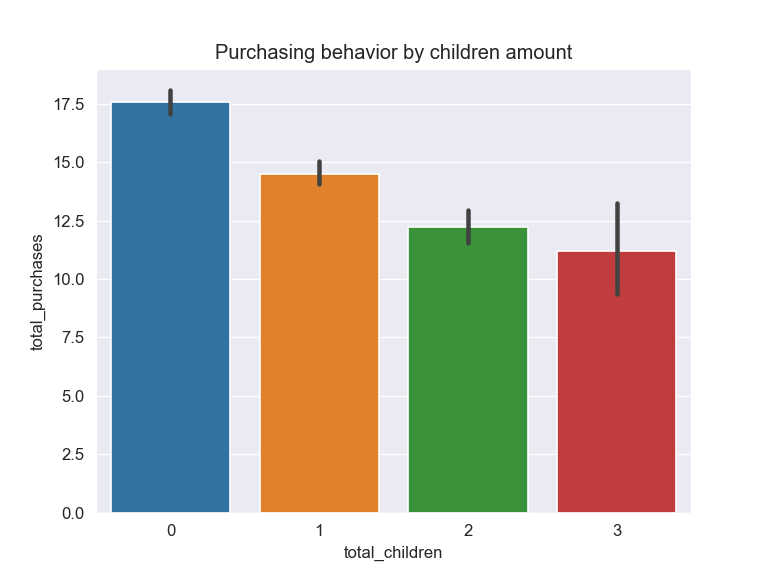

In [44]:
plt.figure()
sns.set_style('darkgrid')
# barplot of total_purchases vs. total_children
sns.barplot(y=marketing_data["total_purchases"], x= marketing_data['total_children'])
plt.title('Purchasing behavior by children amount')
plt.show()

Here we can see, that there is relationship between amount of children and total purchases. Customers with no children shop more often and the biger amount of children customers have, the least frequent are their on-line or in-store shop visits. But the reason of such correlation, can be business of customers with more kids, and their total bill at one purchase might be bigger. 

The next analysis of interest is to see if children amount affects how many items customers buy each time.

<IPython.core.display.Javascript object>


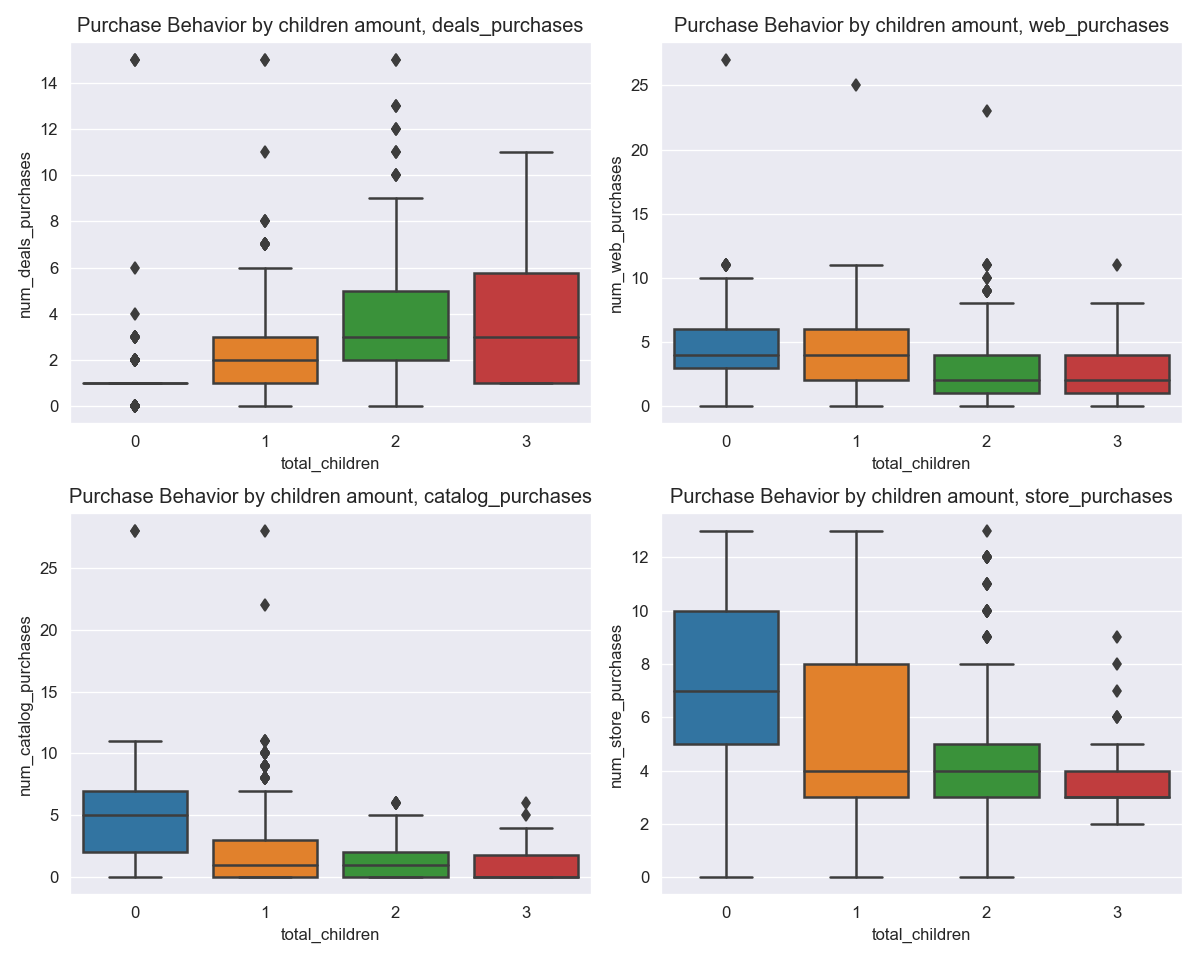

In [45]:
# num purchases columns list
num_purchases_cols = ["num_deals_purchases", "num_web_purchases", "num_catalog_purchases", "num_store_purchases"]
plot = 0
fig = plt.figure(figsize=(10,8))
sns.set_style('darkgrid')
# looping through the length of the list
for i in range(len(num_purchases_cols)):
    plot += 1
    # setting up the subplots
    ax = plt.subplot(2, 2, plot)
    # boxplot of of num purchases vs. total_children
    sns.boxplot(x=marketing_data["total_children"], y= marketing_data[num_purchases_cols[i]])
    plt.title("Purchase Behavior by children amount, {}".format(num_purchases_cols[i].strip('num_')))

plt.tight_layout()
plt.show()

This chart yields some very interesting insights. Here are some notable ones:
- customers with `2` and `3` children tend to be the most interested in deals.
- on average, `0` children group customers tend to shop the most in store, and through the catalog.
- customers with `1` and `0` children make slightly more web purchases, than the athers.

This information could be super helpful for a marketing department as strategies could be used to increase in store purchases for customers with more kids, or create more interresting deals for customers with no ore one child.

To take the analysis further, a new DataFrame is created, which only has information about shopper children amount group and the total purchase amounts each group buys (mnt_{type}_products). This new DataFrame will have children amount as row data to make plotting a grouped bar graph easier.

In [46]:
children_and_amounts = marketing_data.loc[:, ('total_children', 'mnt_wines', 'mnt_fruits', 'mnt_meat_products',\
                                              'mnt_fish_products', 'mnt_sweet_products', 'mnt_gold_products')]
children_and_amounts = children_and_amounts.groupby('total_children').sum().reset_index()

<IPython.core.display.Javascript object>


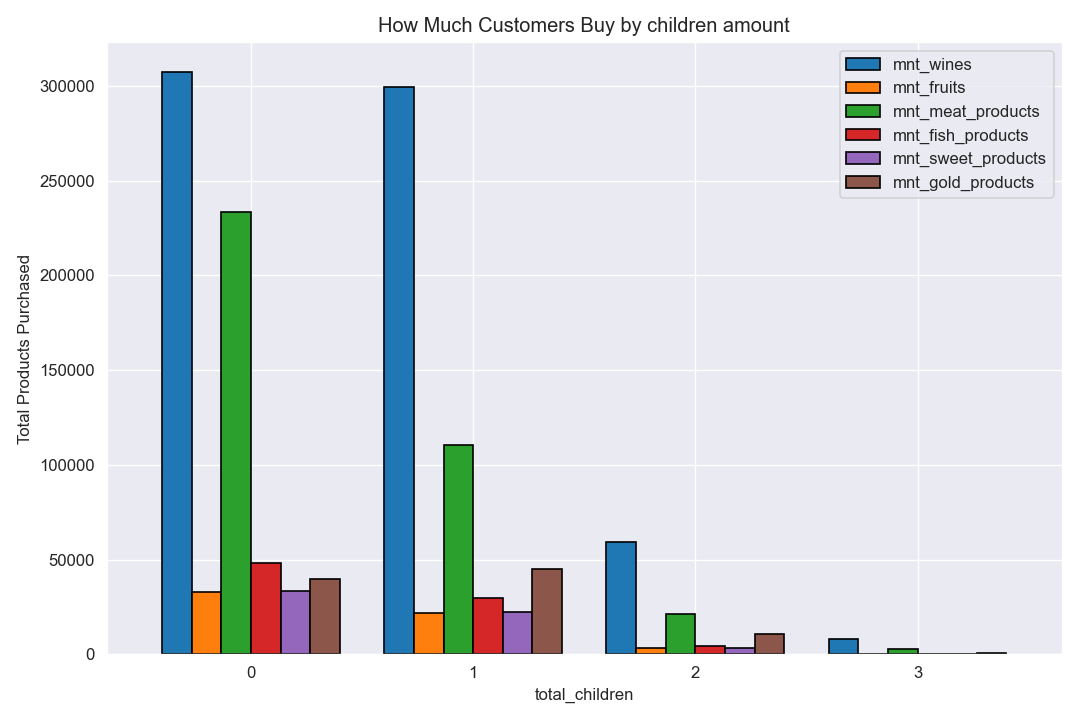

In [47]:
fig, ax = plt.subplots(figsize=(9, 6))
sns.set_style('darkgrid')

col_products = [
'mnt_wines', 
'mnt_fruits', 
'mnt_meat_products', 
'mnt_fish_products', 
'mnt_sweet_products', 
'mnt_gold_products'
]

# bar graph of amount of items bought in the store grouped by total_children
children_and_amounts.plot(x='total_children', y=col_products, kind='bar', ax=ax,  width=0.8, edgecolor='black')
plt.title("How Much Customers Buy by children amount")
plt.ylabel("Total Products Purchased")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Across the board, amount of children seem to effect purchasing habits. We can see, that people with no to one kid tend to buy more, especially big difference can be seen in meat products purchases. Wine purchases for 0 and 1 kid groups are both almost similarly high. 

Customers with 2 and 3 children don't spend much in this store, but the product distribution in their shoping lists remains the same, as for those, who buys more and has less children (wines and meats are still most preferable products to buy).

**Results from existing marketing campaigns**<a class="anchor" id="section3_8"></a>

We will explore customer engagement in 5 recent campaings. For this analysis, new DataFrame is created, which only has information about shoppers `age_group` and the campaign engagement (`accepted_cmp{number}`).

In [48]:
age_and_campaign = marketing_data.loc[:, ('age_group', 'accepted_cmp1', 'accepted_cmp2', 'accepted_cmp3', 'accepted_cmp4',
                                          'accepted_cmp5')]
age_and_campaign = age_and_campaign.groupby('age_group').sum().reset_index()

<IPython.core.display.Javascript object>


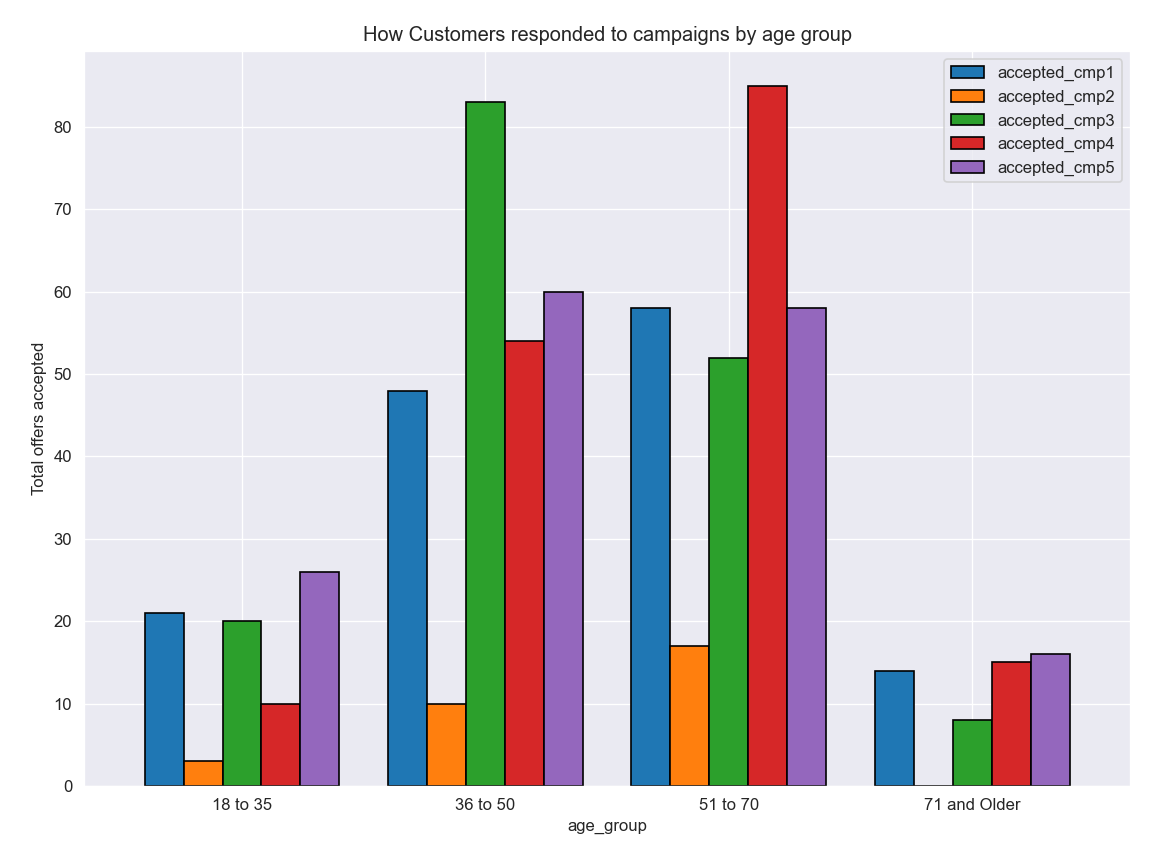

In [49]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.set_style('darkgrid')

col_campaigns = [
'accepted_cmp1', 
'accepted_cmp2', 
'accepted_cmp3', 
'accepted_cmp4',
'accepted_cmp5'
]

# bar graph of amount of offers accepted in the store grouped by age group
age_and_campaign.plot(x='age_group', y=col_campaigns, kind='bar', ax=ax,  width=0.8, edgecolor='black')
plt.title("How Customers responded to campaigns by age group")
plt.ylabel("Total offers accepted")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

We can notice, that in age group `36 to 50` most popular was campaign 3. At the same time the most engagement of `51 to 70` age group had campaign 4. While campaign 2 was least popular in all age groups. As majority of customers are in between 36 and 70, we can say, that campaigns 3 and 4 had most succes overall.  

**Geographical data**<a class="anchor" id="section3_9"></a>

Here we will explore customers distribution by `country`.

<IPython.core.display.Javascript object>


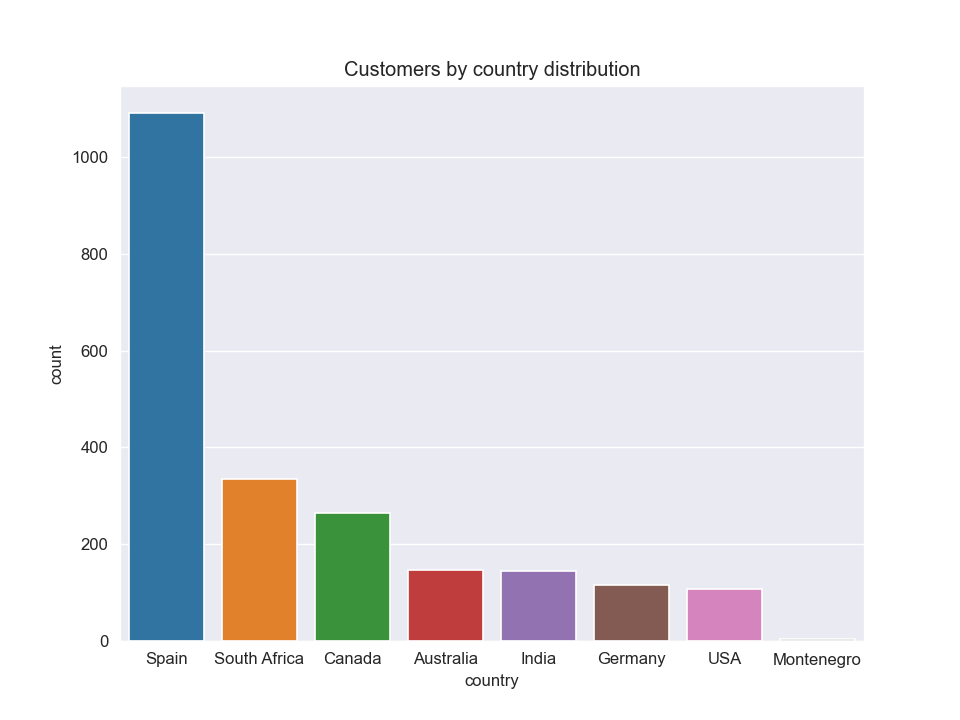

In [50]:
marketing_data['country'] = marketing_data['country'].map({'SP': 'Spain', 'SA': 'South Africa', 'CA': 'Canada', 'AUS': 'Australia', 'IND': 'India', 'GER': 'Germany', 'US': 'USA', 'ME': 'Montenegro'})
# plotting the country distribution in a bar chart
plt.figure(figsize=(8, 6))
sns.set_style('darkgrid')
sns.countplot(x=marketing_data['country'], order=marketing_data['country'].value_counts(ascending=False).index)
plt.title('Customers by country distribution')
plt.show()

Majority of store customers are located in Spain. Other countries in decreasing order are: South Africa, Canada, Australia, India, Germany, the USA and Montenegro.  

**Date of enrolment vs. recency of last purchase**

Now we are exploring dependencies between `dt_customer` (date of enrolment with the company) and `recency` (number of days since last purchase). 

First we are changing `dt_customer` data type to `datetime` and looking at the date range we are working with.

Next we use scatterplot to explore dependencies.

In [51]:
marketing_data['dt_customer'] = pd.to_datetime(marketing_data['dt_customer'])
print(np.max(marketing_data['dt_customer']))
print(np.min(marketing_data['dt_customer']))

print(np.max(marketing_data['recency']))
print(np.min(marketing_data['recency']))

2014-06-29 00:00:00
2012-07-30 00:00:00
99
0


<IPython.core.display.Javascript object>


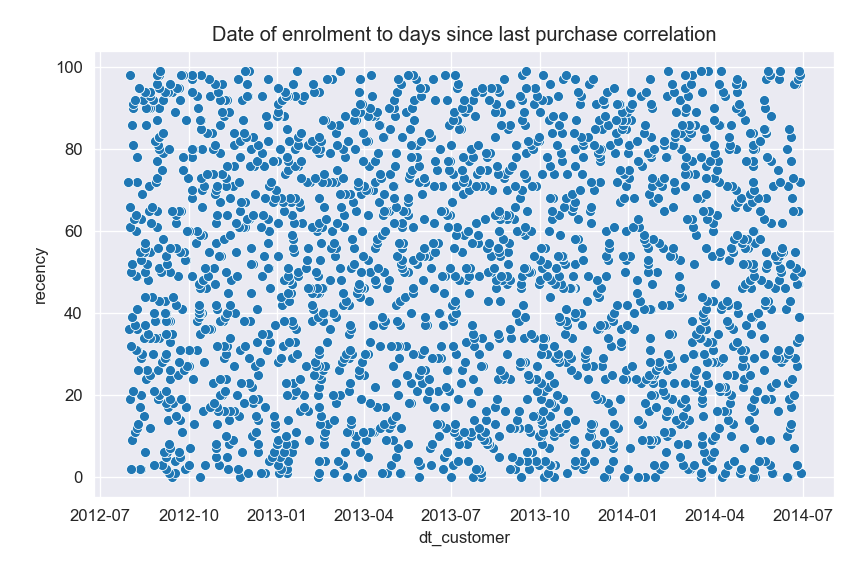

In [52]:
fig = plt.figure(figsize=(6,4))
sns.set_style('darkgrid')
sns.scatterplot(x=marketing_data['dt_customer'], y= marketing_data['recency'])
plt.title("Date of enrolment to days since last purchase correlation")

plt.tight_layout()
plt.show()

There is no correlation between `dt_customer`(when customer enroled with the company) and `recency` (number of days since last purchase).

**Customer complaints**<a class="anchor" id="section3_10"></a>

We will explore customer `complain` by `age_group`.


<IPython.core.display.Javascript object>


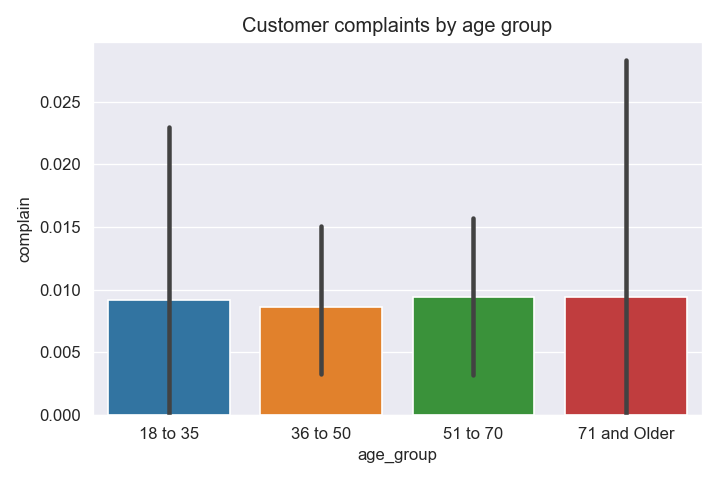

In [53]:
fig = plt.figure(figsize=(6,4))
sns.set_style('darkgrid')
sns.barplot(x=marketing_data['age_group'], y= marketing_data['complain'], 
            order=["18 to 35", "36 to 50", "51 to 70", "71 and Older"])
plt.title("Customer complaints by age group")

plt.tight_layout()
plt.show()

While there is not a big difference in customer complains by age group overall, some of `18 to 35` and `71 and Older` tend to complain more.  

To explore relationship between customer `complaint` and `income`, we will break `income` into groups and plot the data.

<IPython.core.display.Javascript object>


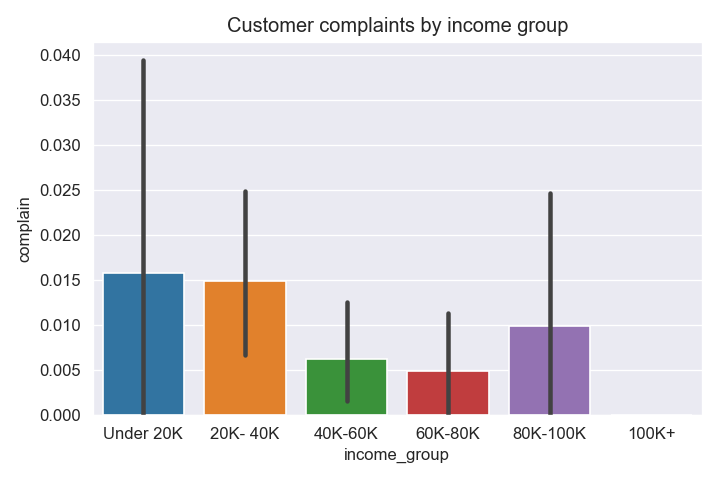

In [54]:
# function that breaks up each income into a group
def income_groups(income):
    if 0 <= income <= 20000:
        return "Under 20K"
    elif 20001 <= income <= 40000:
        return "20K- 40K"
    elif 40001 <= income <= 60000:
        return "40K-60K"
    elif 60001 <= income <= 80000:
        return "60K-80K"
    elif 80001 <= income <= 100000:
        return "80K-100K"
    else:
        return "100K+"

# applying the function to the dataframe
marketing_data['income_group'] = marketing_data.income.apply(income_groups)

fig = plt.figure(figsize=(6,4))
sns.set_style('darkgrid')
sns.barplot(x=marketing_data['income_group'], y= marketing_data['complain'], 
            order=["Under 20K", "20K- 40K", "40K-60K", "60K-80K", "80K-100K", "100K+"])
plt.title("Customer complaints by income group")

plt.tight_layout()
plt.show()

We can see, that customers with lower income have more complaints, then those, with medium income overall. At the same time customers with income over 100K are not complaining at all. 

To explore this relationships further we are ploting purchase behavior by income with `complain` parameter. 

<IPython.core.display.Javascript object>


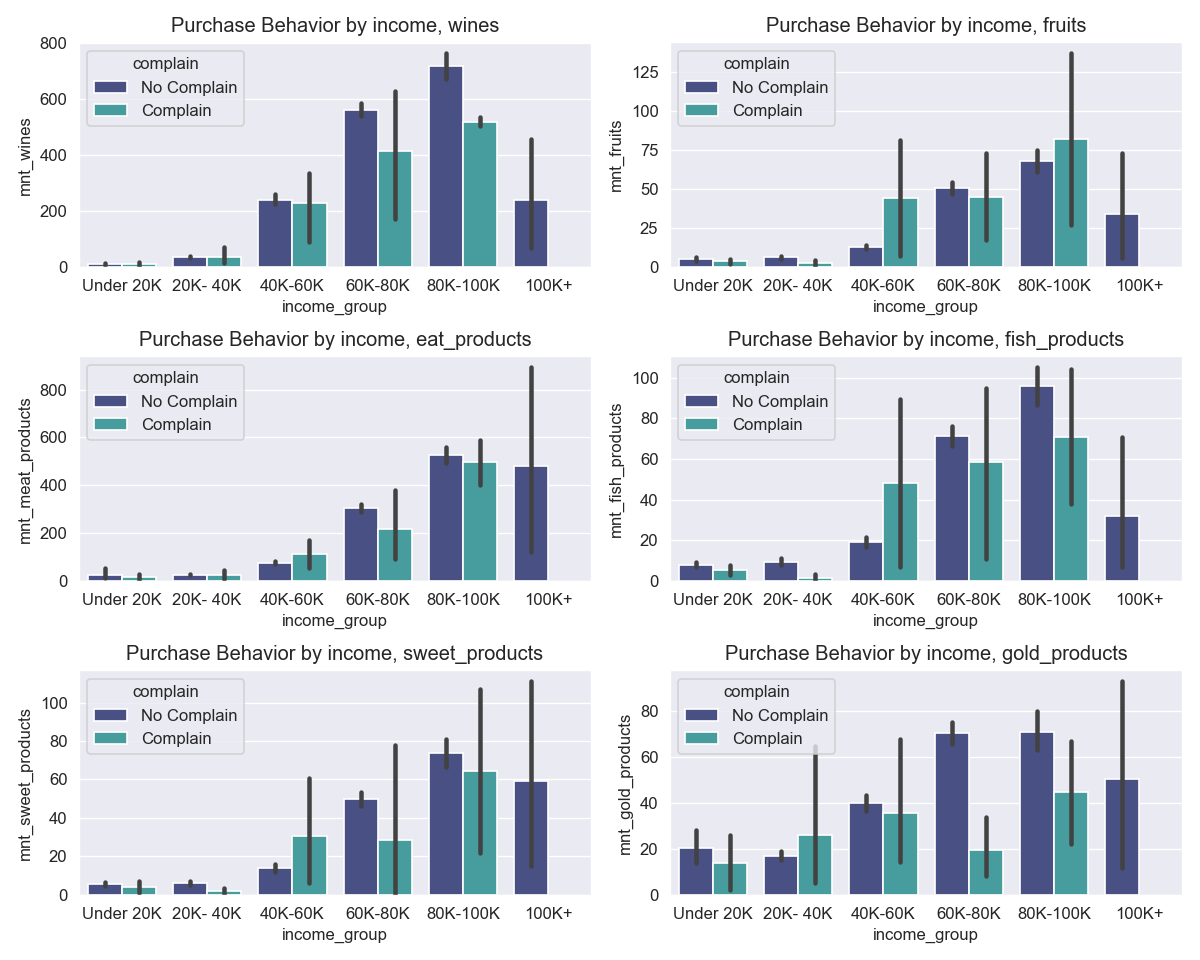

In [55]:
# amounts of items list
amounts_list = ["mnt_wines", "mnt_fruits", "mnt_meat_products", "mnt_fish_products", "mnt_sweet_products", "mnt_gold_products"]

marketing_data["complain"] = marketing_data["complain"].map({0: 'No Complain', 1: 'Complain'})

# keeps count of plot for subplots
plot = 0
fig = plt.figure(figsize=(10,8))
sns.set_style('darkgrid')
# for loop to go through length of amounts list
for i in range(len(amounts_list)):
    plot += 1
    # subplot to create grid of plots
    ax = plt.subplot(3, 2, plot)
    # scatterplot of amount of items bought vs. income
    sns.barplot(x=marketing_data["income_group"], y= marketing_data[amounts_list[i]], hue=marketing_data["complain"], 
                    palette="mako", order=["Under 20K", "20K- 40K", "40K-60K", "60K-80K", "80K-100K", "100K+"])
    plt.title("Purchase Behavior by income, {}".format(amounts_list[i].strip('mnt_')))
plt.tight_layout()
plt.show()

As `80K-100K` was not the most complaining group by income, we can see, that they spend a lot in the store, so their complaints are very valuable. Also we can see the difference between amounts of purchases with complaint and without complaints. If purchases with complaints outstand those without it might mean, that there could be a problem with this type of products.

Most compaints outstand no complaints for fruit, fish and sweet products. The reason for that might be shorter stay fresh range for them.   

### Conclusion <a class="anchor" id="conclusion"></a>

#### Findings Overview

It has been shown `income` has the strongest relationship with purchase behavior of customers. However, interesting insights about `education` and `age` along with `age_group` have still been noted. These insights would be very helpful to how this store markets deals to their customers and prices items, such as wine since higher income groups tend to dominate alcohol sales. There is also opportunity to increase market to the `18 to 35` and `71 and Older` age groups to drive products sales. 

`Marital_status` does not has much effect on purchasing behavior, but we can notice, that people in relationships (Maried and Together) are the majority of store customers.

`Total_children` amount has relationship on customer's purchses. Majority of customers have 1 child, they are not very interrested in deals (those, whith more kids prefer deals purchases) and shop more in store, than online. However, customer with no children shop in-store the most and also make majority of catalog purchases. So there is an oportunity to increse store purchases for shopers with many kids, as well as bringing more deals of interrest for customers without kids.

While exploring recent campaign success, we noticed that age groups `36 to 50` and `51 to 70` were most engaged and campaigns `3 ` and `4` had most succes overall. 

Majority of store customers are located in Spain. Other countries in decreasing order are: South Africa, Canada, Australia, India, Germany, the USA and Montenegro. 

Customers `complaint` depends more on `income` group, customers with lower income tend to complain more often. While there is not a big relation between `complain` and `age_group`, customers in group `71 and Older` tend to complain more. If we look at groups of products, that people complain more, those are fruit, fish and sweet products. All this information gives us space for improvement, like increasing quality of lower range products, checking how good are fresh products stored and finding ways to increase older age group satisfaction.  